<a href="https://colab.research.google.com/github/flohmannjr/Alcohol_and_Life_Expectancy/blob/main/Alcohol_and_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alcohol and Life Expectancy

Kaggle source: https://www.kaggle.com/datasets/thedevastator/relationship-between-alcohol-consumption-and-lif

# Imports

In [1]:
!pip install matplotlib --upgrade -q

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Config

In [3]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.labelsize'] = 'small'

plt.style.use('seaborn-v0_8-darkgrid')

SEED = 2008193

CMAP = plt.colormaps.get_cmap("tab10")

# Data

In [4]:
df_drinks  = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/Alcohol_and_Life_Expectancy/main/drinks.csv')
df_lifeexp = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/Alcohol_and_Life_Expectancy/main/lifeexpectancy-verbose.csv')

In [5]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 193 non-null    int64  
 3   spirit_servings               193 non-null    int64  
 4   wine_servings                 193 non-null    int64  
 5   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 9.2+ KB


| **Column name**              | **Description**                                                  |
|------------------------------|------------------------------------------------------------------|
| country                      | Name of the country.                                             |
| beer_servings                | Number of beer servings per person in the country.               |
| spirit_servings              | Number of spirit servings per person in the country.             |
| wine_servings                | Number of wine servings per person in the country.               |
| total_litres_of_pure_alcohol | Total litres of pure alcohol consumed per person in the country. |

In [6]:
df_lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          6408 non-null   int64  
 1   GhoCode                        6408 non-null   object 
 2   GhoDisplay                     6408 non-null   object 
 3   PublishStateCode               6408 non-null   object 
 4   PublishStateDisplay            6408 non-null   object 
 5   YearCode                       6408 non-null   int64  
 6   YearDisplay                    6408 non-null   int64  
 7   RegionCode                     6408 non-null   object 
 8   RegionDisplay                  6408 non-null   object 
 9   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 10  WorldBankIncomeGroupDisplay    5244 non-null   object 
 11  CountryCode                    6408 non-null   object 
 12  CountryDisplay                 6408 non-null   o

| **Column name**               | **Description**                                 |
|-------------------------------|-------------------------------------------------|
| GhoCode                       | Global Health Observatory code                  |
| GhoDisplay                    | Global Health Observatory display name          |
| PublishStateCode              | Publish state code                              |
| PublishStateDisplay           | Publish state display name                      |
| YearCode                      | Year code                                       |
| YearDisplay                   | Year display name                               |
| RegionCode                    | Region code                                     |
| RegionDisplay                 | Region display name                             |
| WorldBankIncomeGroupGroupCode | World Bank Income Group Group Code              |
| WorldBankIncomeGroupDisplay   | World Bank Income Group Display Name            |
| CountryCode                   | Country code                                    |
| CountryDisplay                | Country display name                            |
| SexCode                       | Sex code                                        |
| SexDisplay                    | Sex display name                                |
| DisplayValue                  | Display value                                   |
| Numeric                       | Numeric value                                   |

## Countries

In [7]:
# New df_lifeexp column with equivalent country names from df_drinks.

df_lifeexp['Country'] = df_lifeexp['CountryDisplay']

df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Antigua and Barbuda',                                  ['Country']] = 'Antigua & Barbuda'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Bolivia (Plurinational State of)',                     ['Country']] = 'Bolivia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Bosnia and Herzegovina',                               ['Country']] = 'Bosnia-Herzegovina'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Brunei Darussalam',                                    ['Country']] = 'Brunei'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == "Côte d'Ivoire",                                        ['Country']] = "Cote d'Ivoire"
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == "Democratic People's Republic of Korea",                ['Country']] = 'North Korea'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Democratic Republic of the Congo',                     ['Country']] = 'DR Congo'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Guinea_Bissau',                                        ['Country']] = 'Guinea-Bissau'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Iran (Islamic Republic of)',                           ['Country']] = 'Iran'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == "Lao People's Democratic Republic",                     ['Country']] = 'Laos'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Micronesia (Federated States of)',                     ['Country']] = 'Micronesia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Republic of Korea',                                    ['Country']] = 'South Korea'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Republic of Moldova',                                  ['Country']] = 'Moldova'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Saint Kitts and Nevis',                                ['Country']] = 'St. Kitts & Nevis'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Saint Lucia',                                          ['Country']] = 'St. Lucia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Saint Vincent and the Grenadines',                     ['Country']] = 'St. Vincent & the Grenadines'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Sao Tome and Principe',                                ['Country']] = 'Sao Tome & Principe'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Syrian Arab Republic',                                 ['Country']] = 'Syria'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'The former Yugoslav republic of Macedonia',            ['Country']] = 'Macedonia'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Timor_Leste',                                          ['Country']] = 'Timor-Leste'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Trinidad and Tobago',                                  ['Country']] = 'Trinidad & Tobago'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'United Kingdom of Great Britain and Northern Ireland', ['Country']] = 'United Kingdom'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'United Republic of Tanzania',                          ['Country']] = 'Tanzania'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'United States of America',                             ['Country']] = 'USA'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Venezuela (Bolivarian Republic of)',                   ['Country']] = 'Venezuela'
df_lifeexp.loc[df_lifeexp['CountryDisplay'] == 'Viet Nam',                                             ['Country']] = 'Vietnam'

In [8]:
# Drop 'South Sudan' from 'Africa'.

df_lifeexp.drop(df_lifeexp[(df_lifeexp['Country'] == 'South Sudan') &
                           (df_lifeexp['RegionCode'] == 'AFR')].index, inplace=True)

In [9]:
# Countries in df_drinks but not in df_lifeexp.

df_drinks['country'][~df_drinks['country'].isin(df_lifeexp['Country'])]

Series([], Name: country, dtype: object)

In [10]:
# Countries in df_lifeexp but not in df_drinks.

df_lifeexp['Country'][~df_lifeexp['Country'].isin(df_drinks['country'])].unique()

array(['South Sudan'], dtype=object)

## World Bank Income Groups

In [11]:
# Setting missing World Bank Income Groups as the most frequenbt value per Country.

for i, d in df_lifeexp[df_lifeexp['WorldBankIncomeGroupGroupCode'].isna()].iterrows():
    df_lifeexp.loc[df_lifeexp['index'] == i, 'WorldBankIncomeGroupGroupCode'] = df_lifeexp['WorldBankIncomeGroupGroupCode'][df_lifeexp['Country'] == d['Country']].value_counts().idxmax()
    df_lifeexp.loc[df_lifeexp['index'] == i, 'WorldBankIncomeGroupDisplay'] = df_lifeexp['WorldBankIncomeGroupDisplay'][df_lifeexp['Country'] == d['Country']].value_counts().idxmax()

## Counts

In [12]:
# Global Health Observatories per Year.
df_lifeexp[['GhoCode', 'GhoDisplay', 'YearDisplay']].value_counts().sort_index()

GhoCode        GhoDisplay                                       YearDisplay
WHOSIS_000001  Life expectancy at birth (years)                 1990           582
                                                                2000           582
                                                                2012           582
                                                                2013           579
WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)  2000           585
                                                                2012           585
                                                                2013           582
WHOSIS_000015  Life expectancy at age 60 (years)                1990           582
                                                                2000           582
                                                                2012           582
                                                                2013           579
dtype: int6

In [13]:
# Global Health Observatory years (11) * Sex codes (3) = Indices per Country (33)

# Number of Countries per Region.
df_lifeexp['RegionDisplay'].value_counts() / 33

Europe                   53.0
Africa                   46.0
Americas                 35.0
Western Pacific          27.0
Eastern Mediterranean    22.0
South_East Asia          11.0
Name: RegionDisplay, dtype: float64

In [14]:
# World Bank Income Groups.
df_lifeexp[['WorldBankIncomeGroupGroupCode', 'WorldBankIncomeGroupDisplay']].value_counts(dropna=False)

WorldBankIncomeGroupGroupCode  WorldBankIncomeGroupDisplay
WB_LMI                         Lower_middle_income            1758
WB_HI                          High_income                    1683
WB_UMI                         Upper_middle_income            1485
WB_LI                          Low_income                     1476
dtype: int64

In [15]:
# Sex codes.
df_lifeexp[['SexCode', 'SexDisplay']].value_counts()

SexCode  SexDisplay
BTSX     Both sexes    2134
FMLE     Female        2134
MLE      Male          2134
dtype: int64

## Consolidation

In [ ]:
df = df_drinks[['country', 'total_litres_of_pure_alcohol']]

df['region'] = None
df['income'] = None
df['gho01']  = None
df['gho02']  = None
df['gho15']  = None

for i, country in enumerate(df['country']):

    df.loc[i, 'region'] = df_lifeexp['RegionDisplay'][df_lifeexp['Country'] == country][:1].values
    df.loc[i, 'income'] = df_lifeexp['WorldBankIncomeGroupDisplay'][df_lifeexp['Country'] == country][:1].values

    df.loc[i, 'gho01'] = df_lifeexp[(df_lifeexp['GhoCode'] == 'WHOSIS_000001') &
                                    (df_lifeexp['YearDisplay'] == 2013) &
                                    (df_lifeexp['SexCode'] == 'BTSX')]['Numeric'][df_lifeexp['Country'] == country].values

    df.loc[i, 'gho02'] = df_lifeexp[(df_lifeexp['GhoCode'] == 'WHOSIS_000002') &
                                    (df_lifeexp['YearDisplay'] == 2013) &
                                    (df_lifeexp['SexCode'] == 'BTSX')]['Numeric'][df_lifeexp['Country'] == country].values

    df.loc[i, 'gho15'] = df_lifeexp[(df_lifeexp['GhoCode'] == 'WHOSIS_000015') &
                                    (df_lifeexp['YearDisplay'] == 2013) &
                                    (df_lifeexp['SexCode'] == 'BTSX')]['Numeric'][df_lifeexp['Country'] == country].values

# Life Expectancy

In [17]:
lifeexp_observatories = df_lifeexp['GhoDisplay'].sort_values().unique()
lifeexp_years         = df_lifeexp['YearDisplay'].sort_values().unique()
lifeexp_regions       = df_lifeexp['RegionDisplay'].sort_values().unique()
lifeexp_incomes       = df_lifeexp['WorldBankIncomeGroupDisplay'].sort_values().unique()

lifeexp_ghos = {'gho01': 'Life expectancy at birth (years)',
                'gho02': 'Healthy life expectancy (HALE) at birth (years)',
                'gho15': 'Life expectancy at age 60 (years)'}

# lifeexp_observatories, lifeexp_years, lifeexp_regions, lifeexp_incomes

## By region

In [18]:
df_region = df_lifeexp[df_lifeexp['SexCode'] == 'BTSX'][['GhoDisplay', 'RegionDisplay', 'YearDisplay', 'Numeric']].groupby(by=['GhoDisplay', 'RegionDisplay', 'YearDisplay']).mean().sort_index()
# df_region

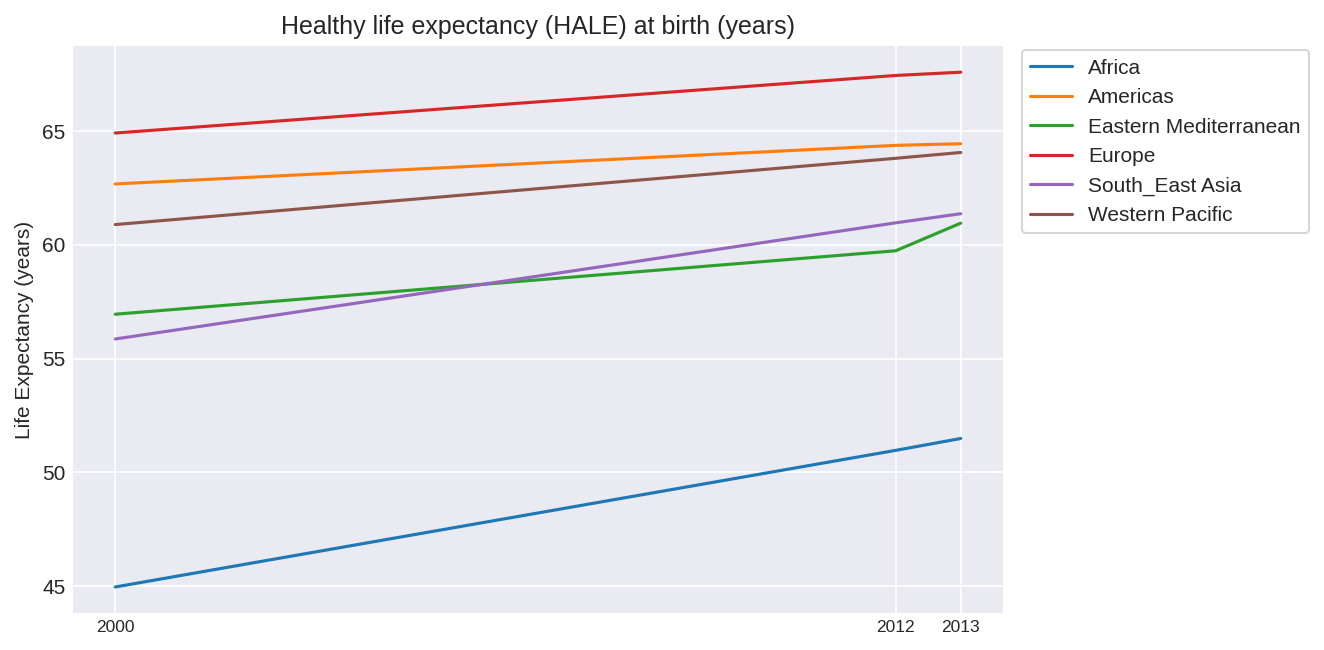

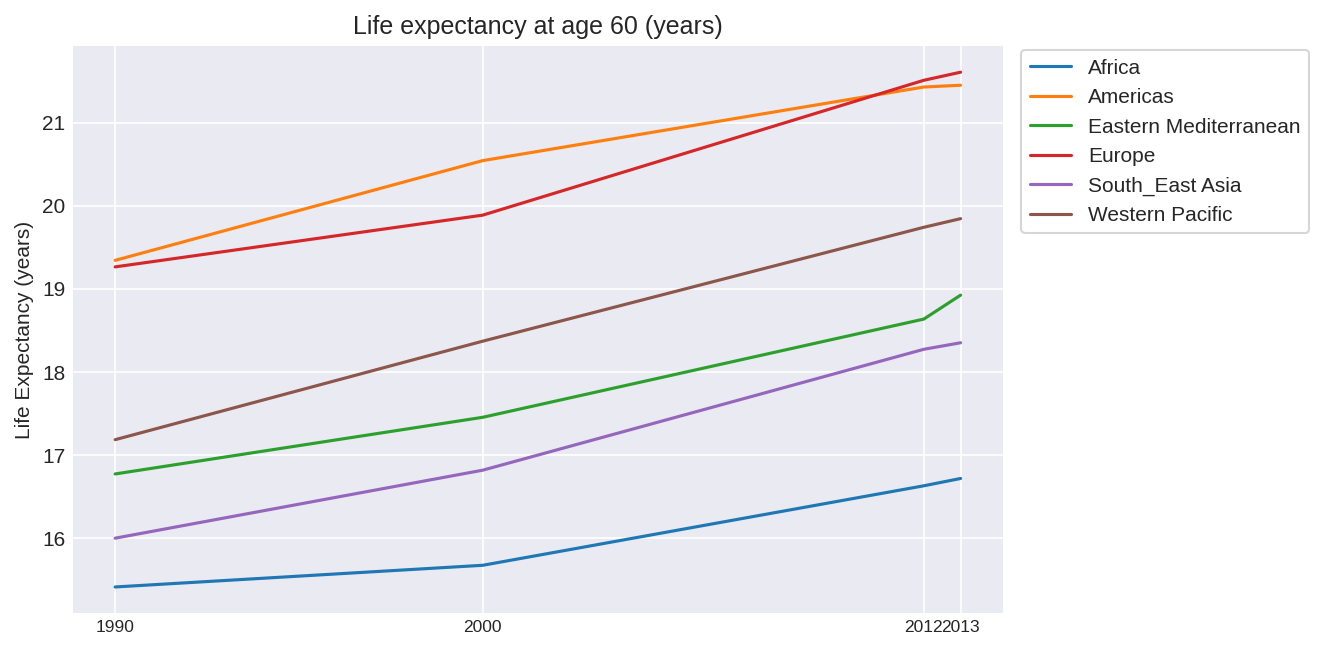

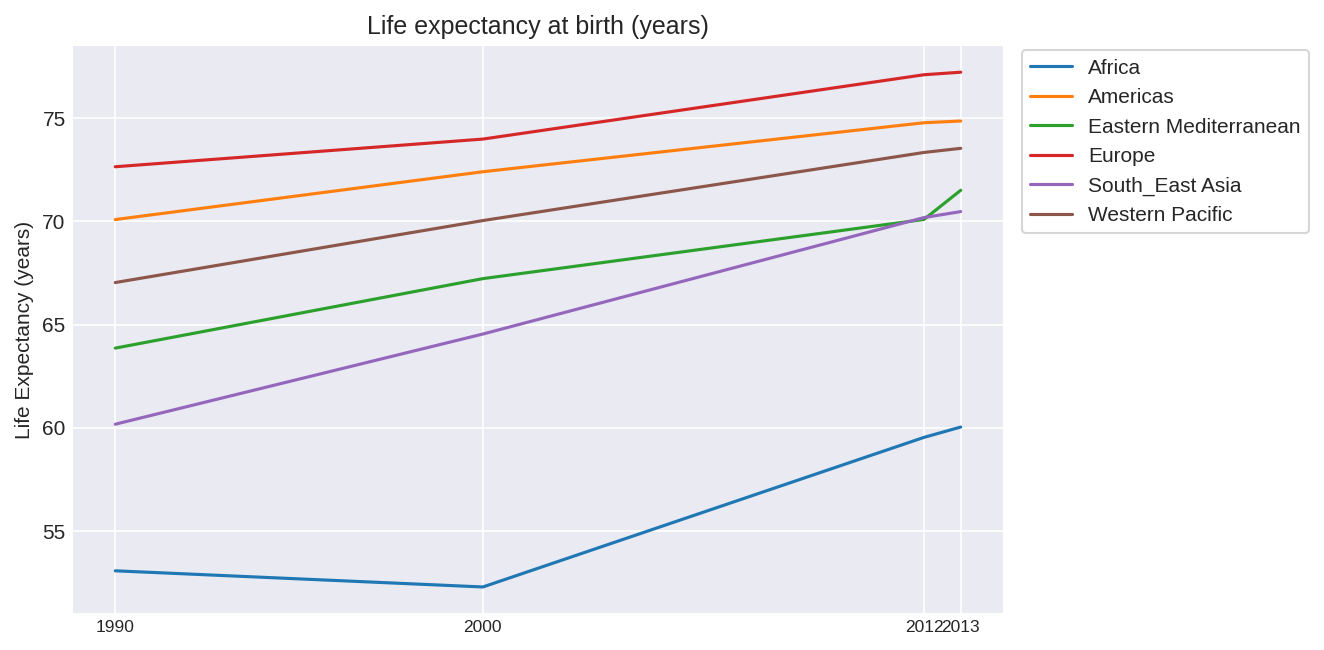

In [19]:
for observatory in lifeexp_observatories:

    for region in lifeexp_regions:

        years = df_region.loc[(observatory, region), :]

        sns.lineplot(data=years.reset_index(), x='YearDisplay', y='Numeric', label=region, palette=CMAP)

    plt.title(observatory)
    plt.xlabel('')
    plt.ylabel('Life Expectancy (years)')

    plt.xticks(ticks=years.index)

    plt.legend(loc=(1.02, 0.67), frameon=True, facecolor='white')

    plt.show()

## By income group

In [20]:
df_income = df_lifeexp[df_lifeexp['SexCode'] == 'BTSX'][['GhoDisplay', 'WorldBankIncomeGroupDisplay', 'YearDisplay', 'Numeric']].groupby(by=['GhoDisplay', 'WorldBankIncomeGroupDisplay', 'YearDisplay']).mean().sort_index()
# df_income

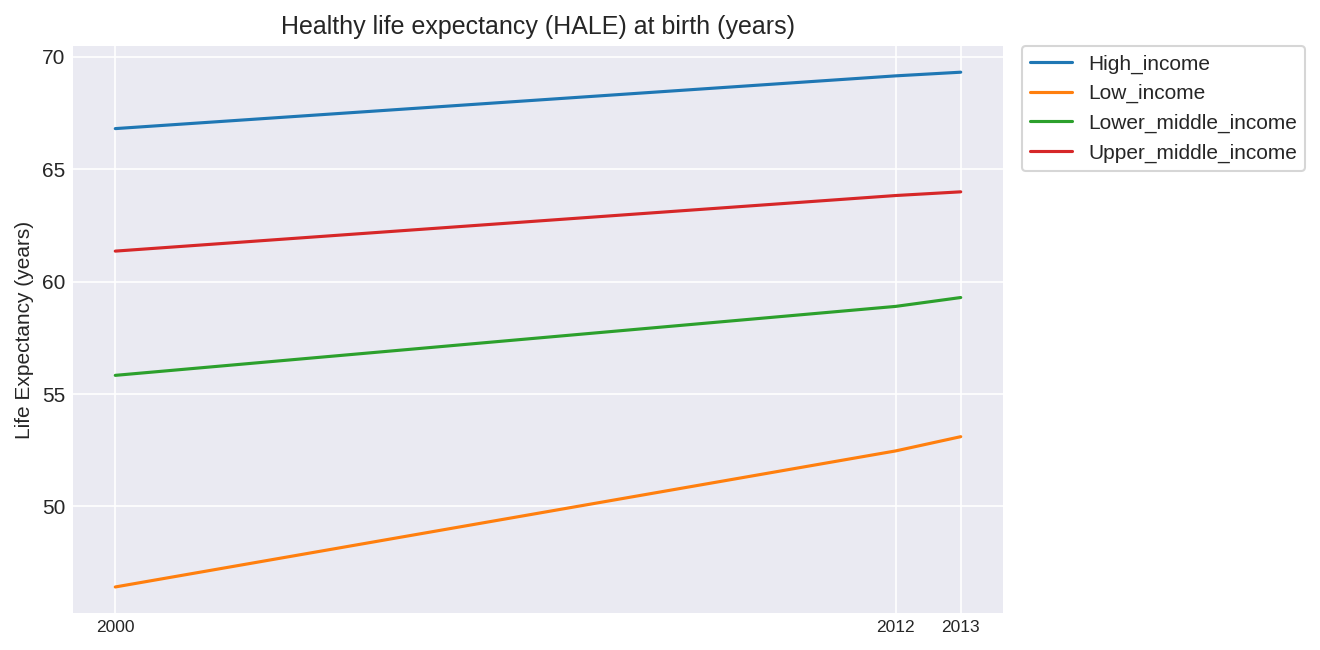

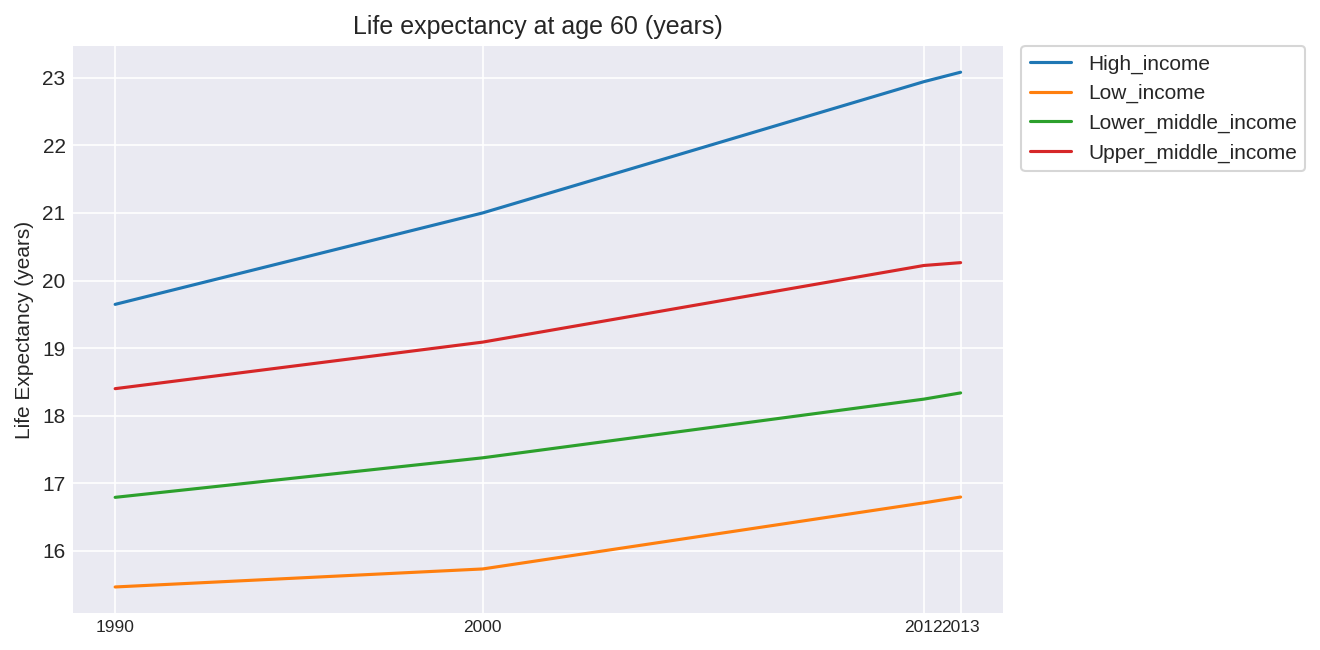

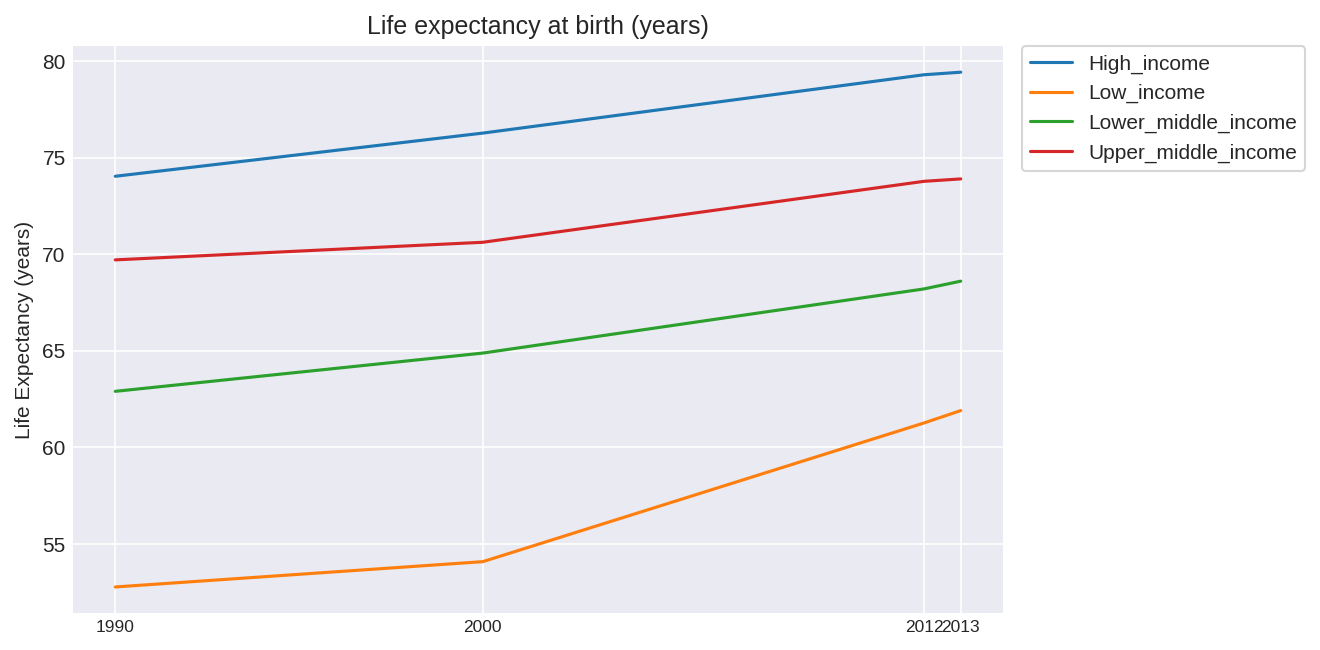

In [21]:
for observatory in lifeexp_observatories:

    for income in lifeexp_incomes:

        years = df_income.loc[(observatory, income), :]

        sns.lineplot(data=years.reset_index(), x='YearDisplay', y='Numeric', label=income, palette=CMAP)

    plt.title(observatory)
    plt.xlabel('')
    plt.ylabel('Life Expectancy (years)')

    plt.xticks(ticks=years.index)

    plt.legend(loc=(1.02, 0.78), frameon=True, facecolor='white')

    plt.show()

# Drinking habits

## By region

In [22]:
df.sort_values(by=['region', 'country'], inplace=True)

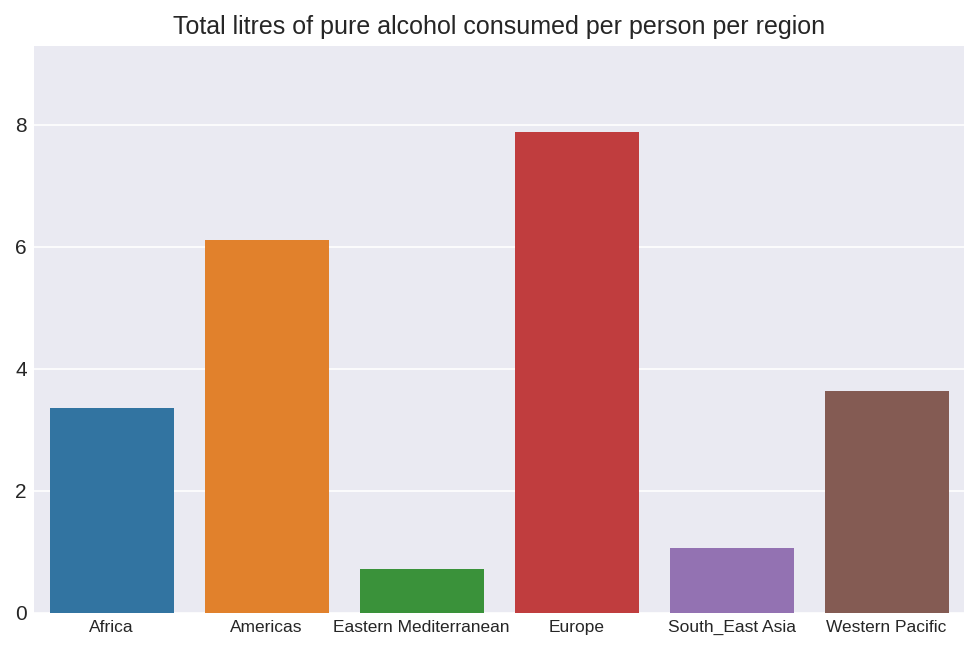

In [23]:
sns.barplot(data=df, x='region', y='total_litres_of_pure_alcohol', estimator=np.mean, errwidth=0, palette=CMAP.name)

plt.title('Total litres of pure alcohol consumed per person per region')
plt.xlabel('')
plt.ylabel('');

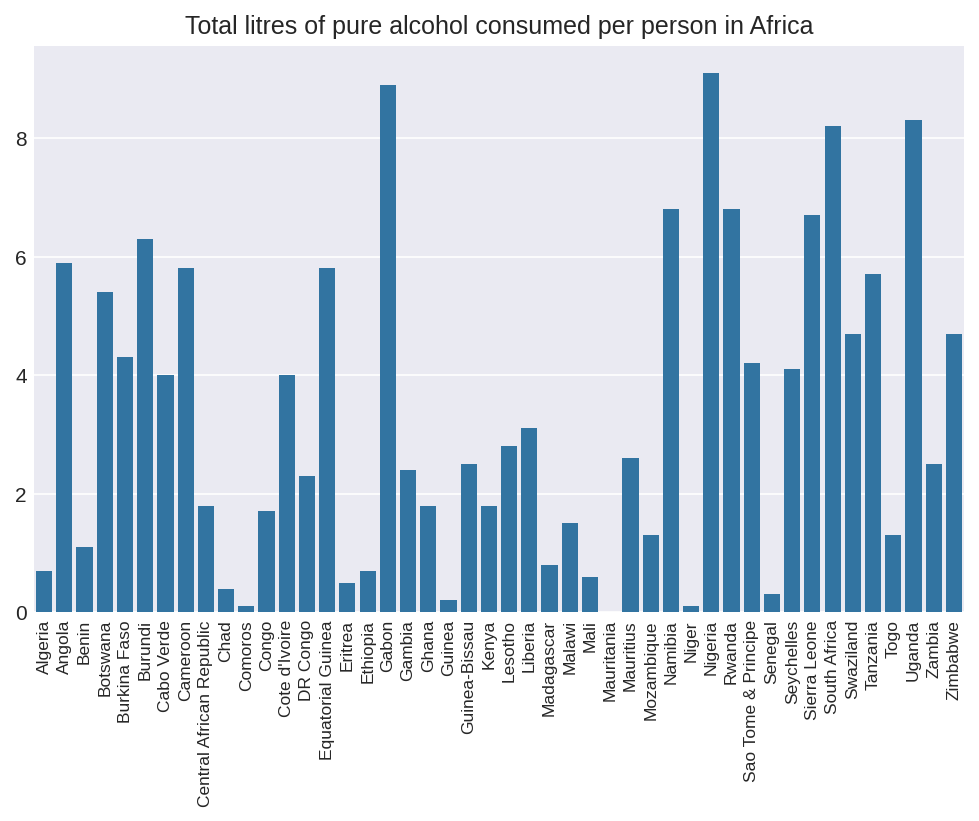

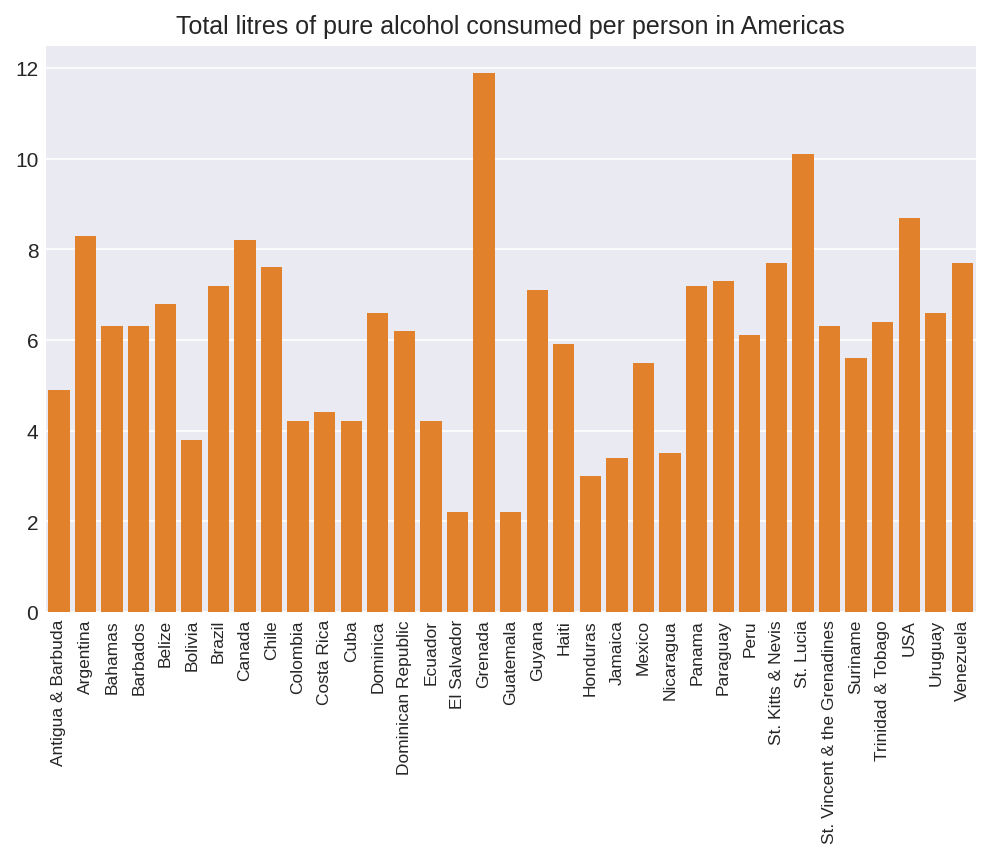

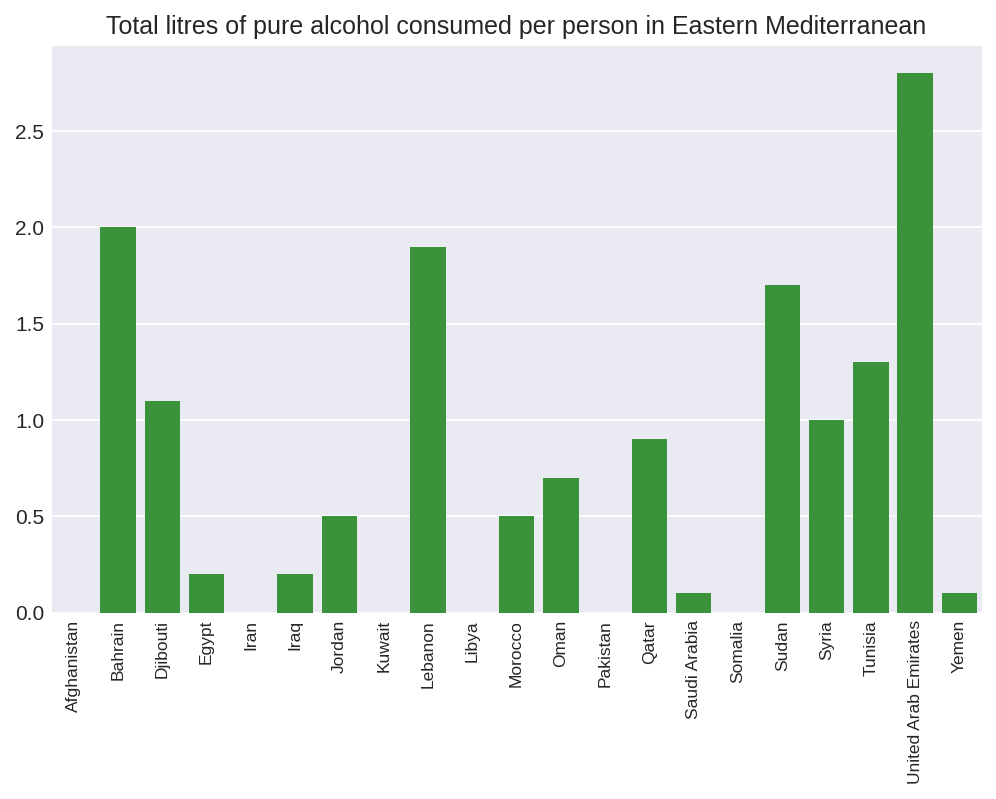

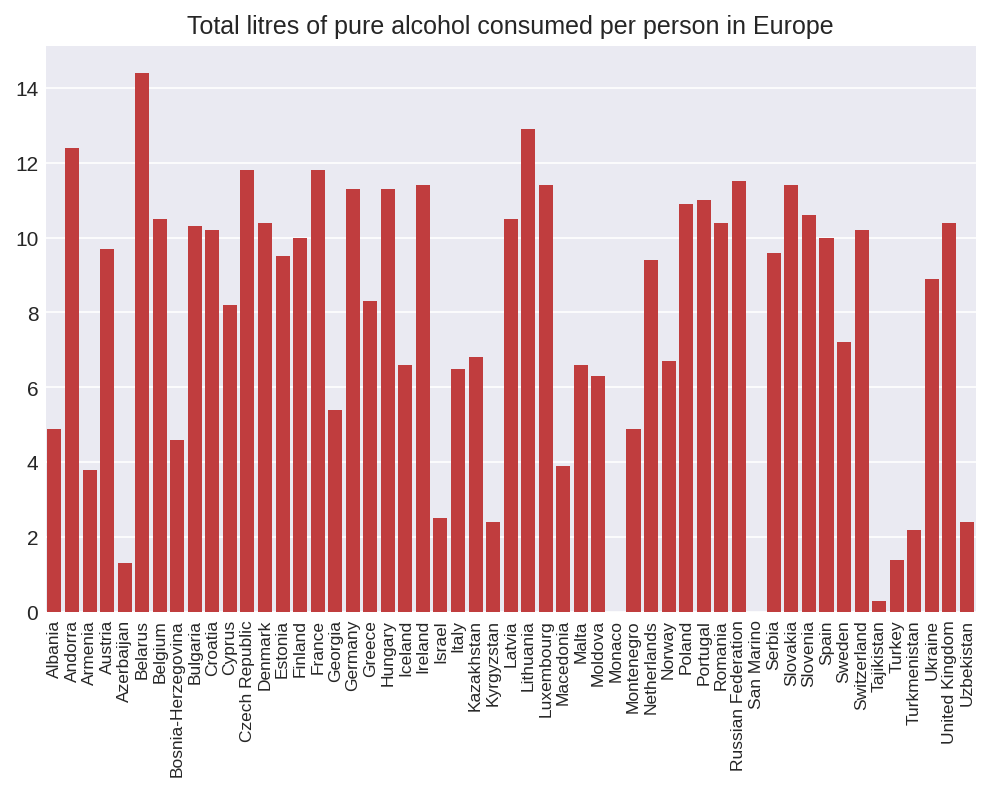

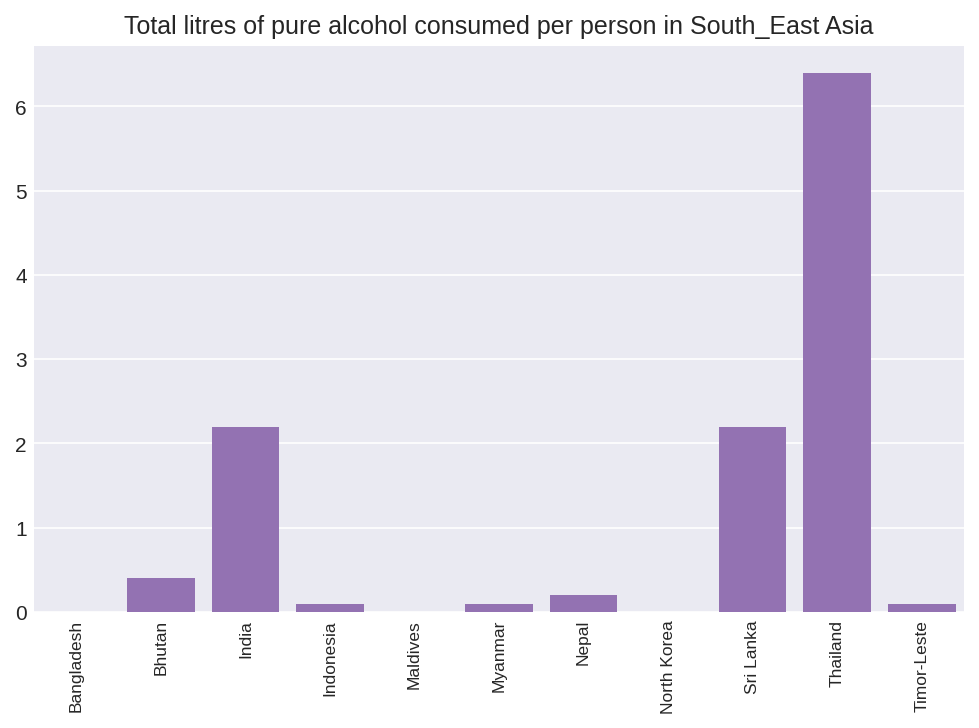

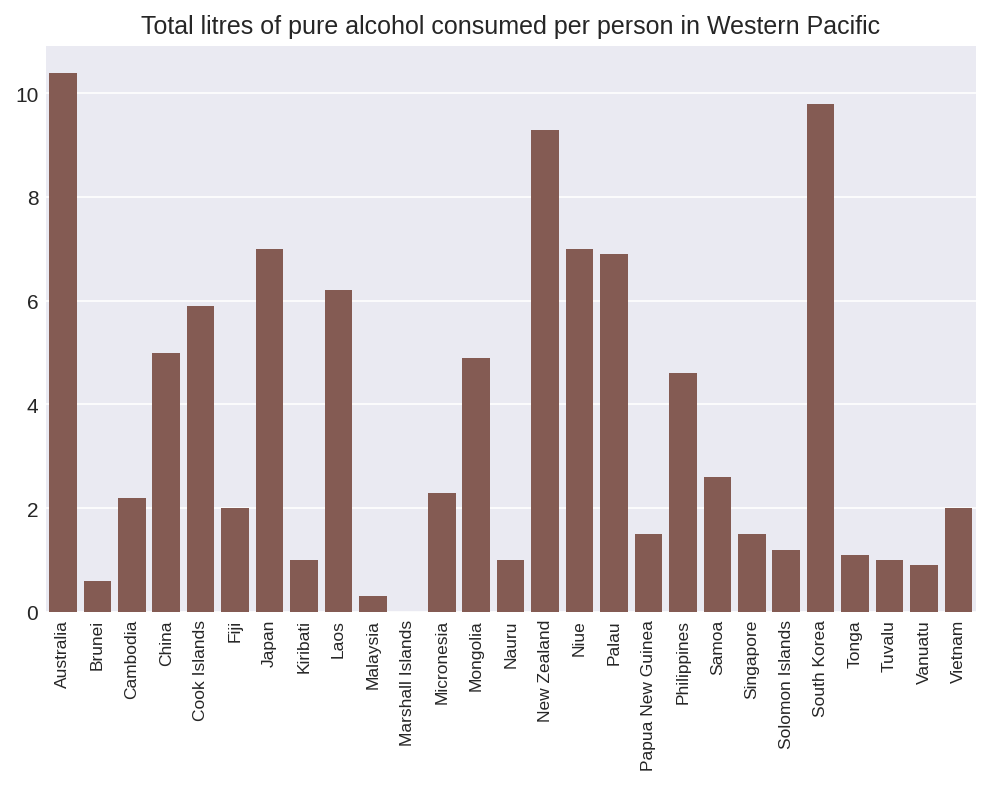

In [24]:
for r, region in enumerate(lifeexp_regions):

    sns.barplot(data=df[df['region'] == region], x='country', y='total_litres_of_pure_alcohol', errwidth=0, color=CMAP.colors[r])

    plt.title(f'Total litres of pure alcohol consumed per person in {region}')
    plt.xlabel('')
    plt.ylabel('')

    plt.xticks(rotation=90)

    plt.show()

## By income group

In [25]:
df.sort_values(by=['income', 'country'], inplace=True)

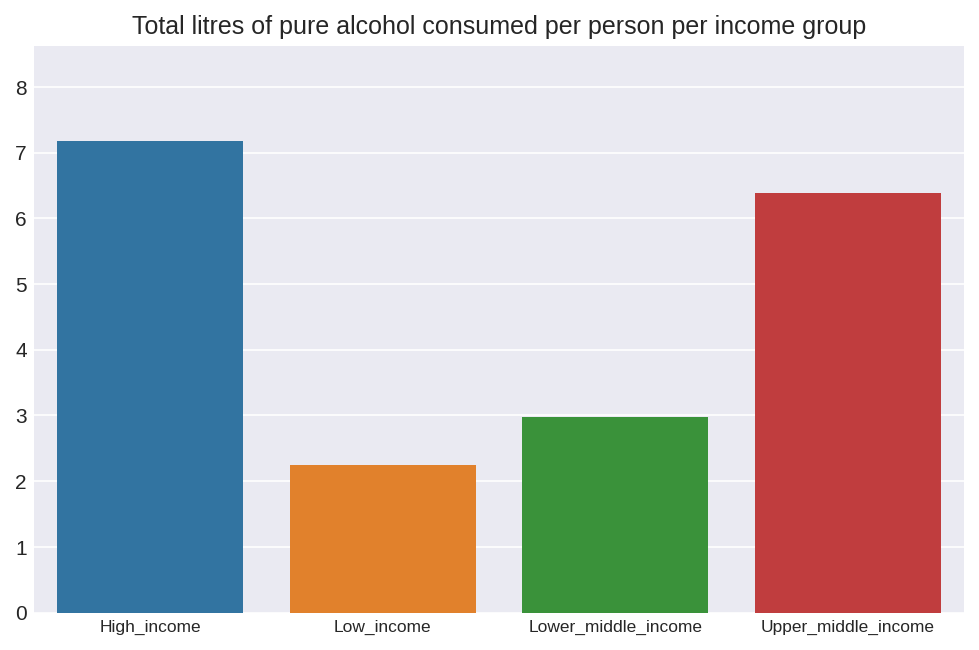

In [26]:
sns.barplot(data=df, x='income', y='total_litres_of_pure_alcohol', estimator=np.mean, errwidth=0, palette=CMAP.name)

plt.title('Total litres of pure alcohol consumed per person per income group')
plt.xlabel('')
plt.ylabel('');

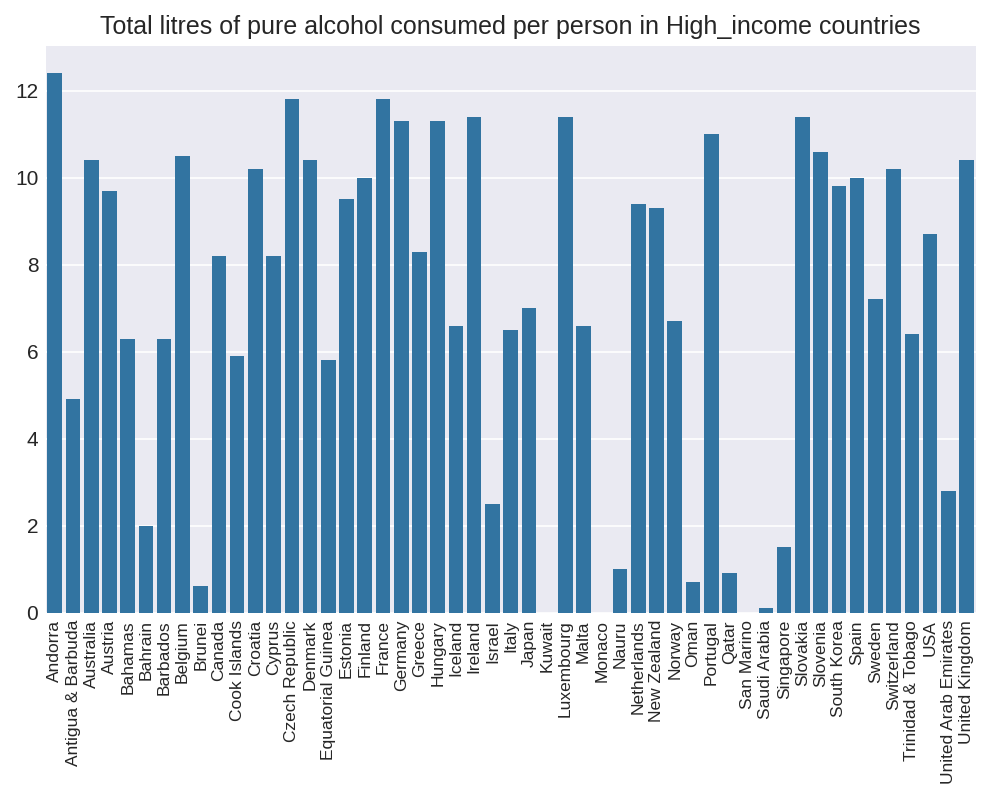

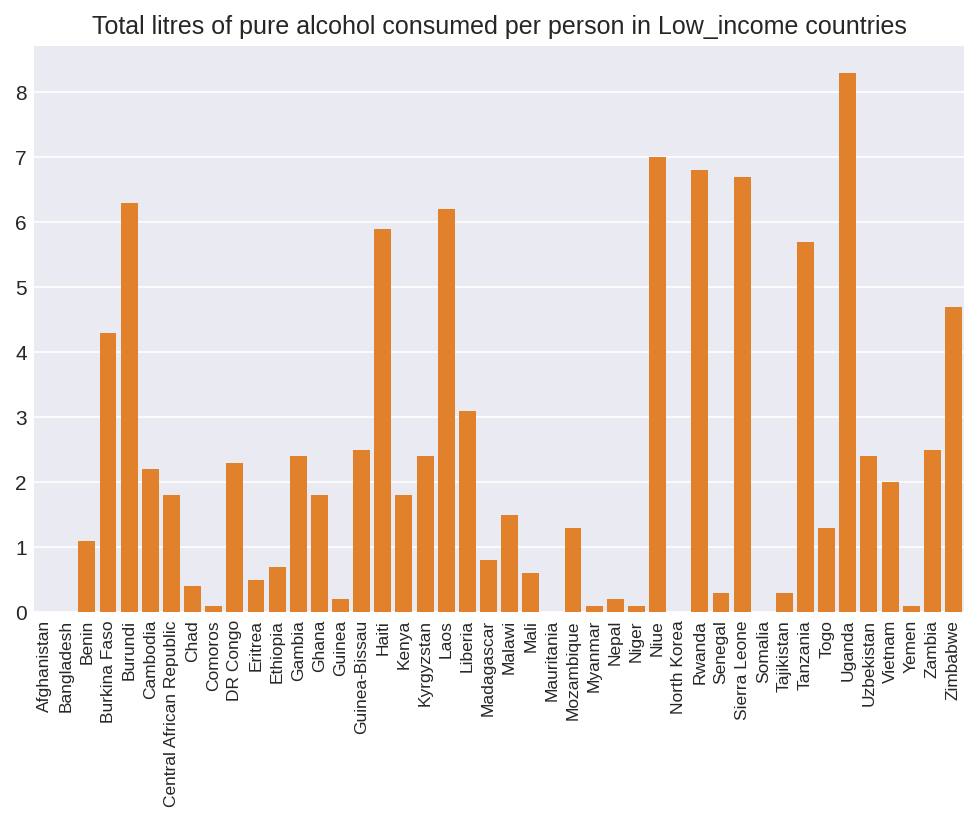

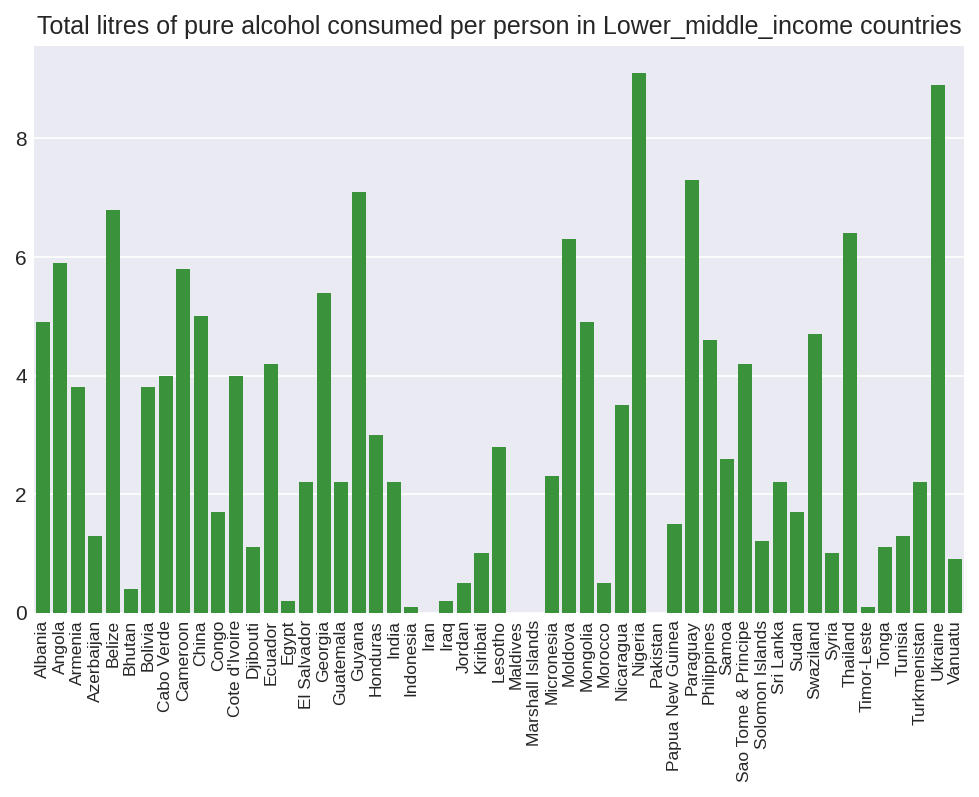

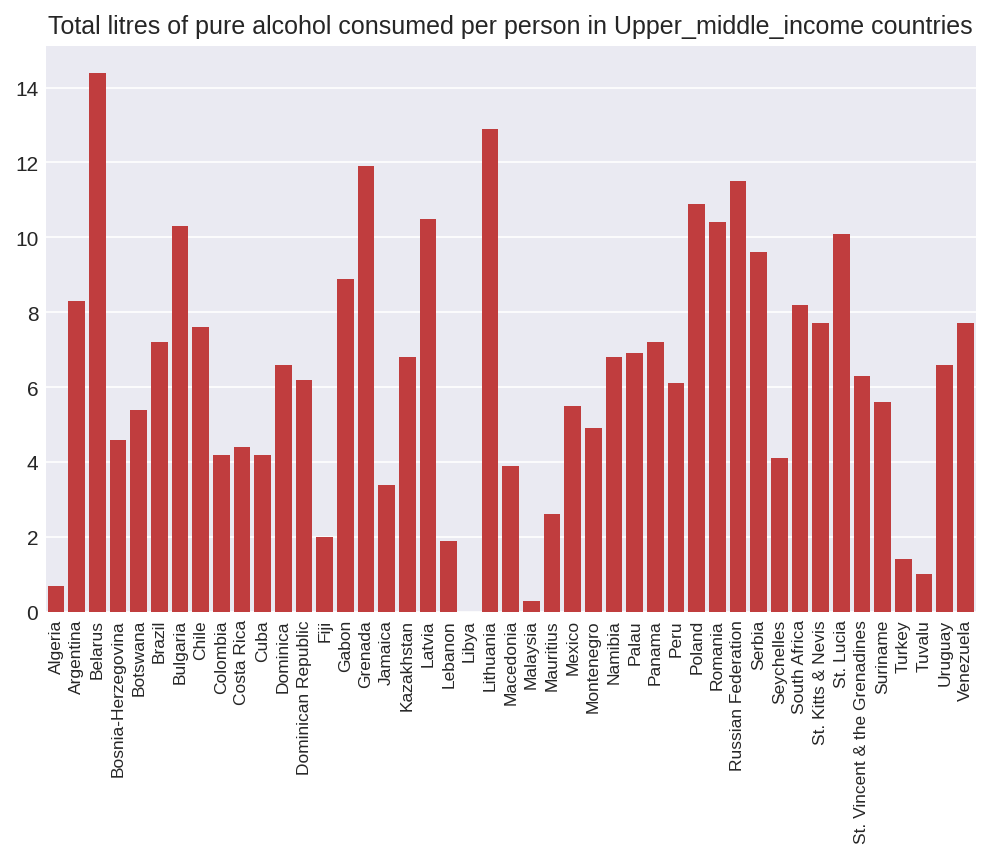

In [27]:
for i, income in enumerate(lifeexp_incomes):

    sns.barplot(data=df[df['income'] == income], x='country', y='total_litres_of_pure_alcohol', errwidth=0, color=CMAP.colors[i])

    plt.title(f'Total litres of pure alcohol consumed per person in {income} countries')
    plt.xlabel('')
    plt.ylabel('')

    plt.xticks(rotation=90)

    plt.show()

# Alcohol consumption and life expectancy possible correlation

## By region

In [28]:
df.sort_values(by=['region', 'country'], inplace=True)

In [29]:
df_region_alcohol = df[['region', 'total_litres_of_pure_alcohol']].groupby(by='region').mean().reset_index()

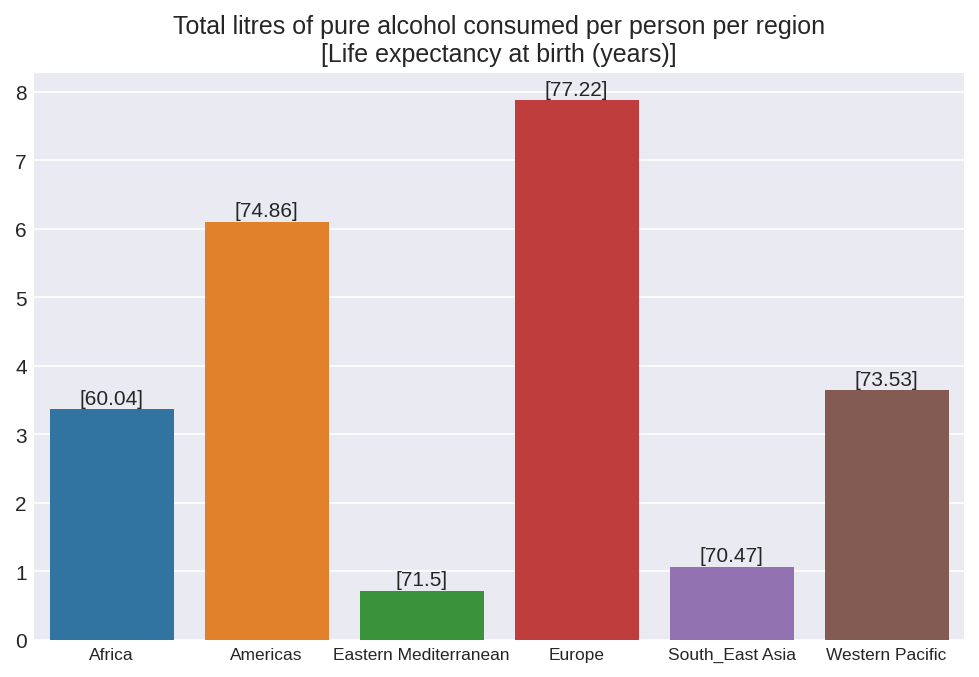

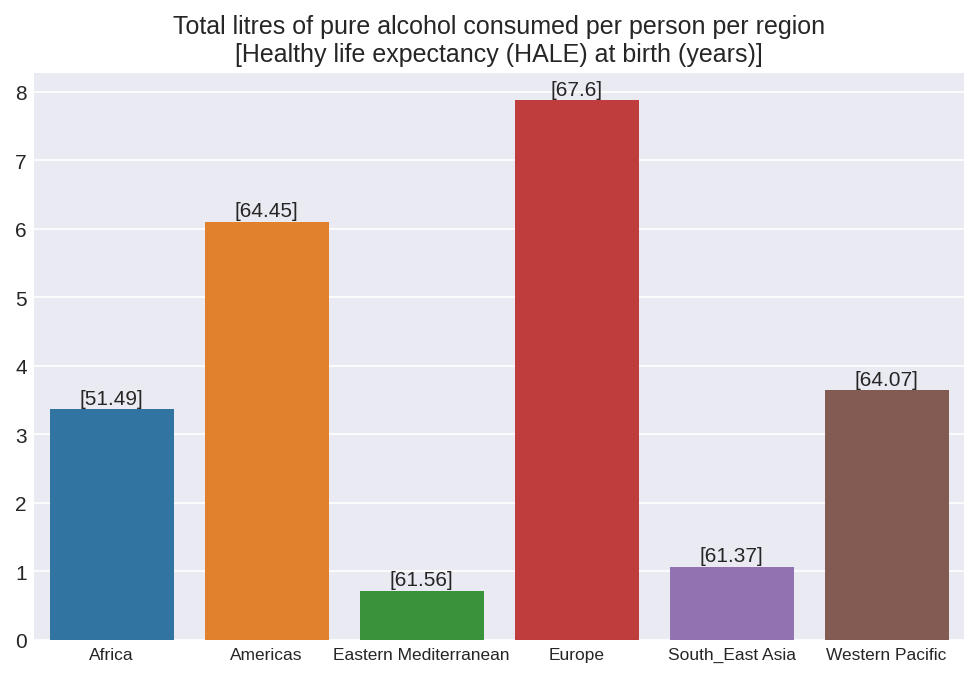

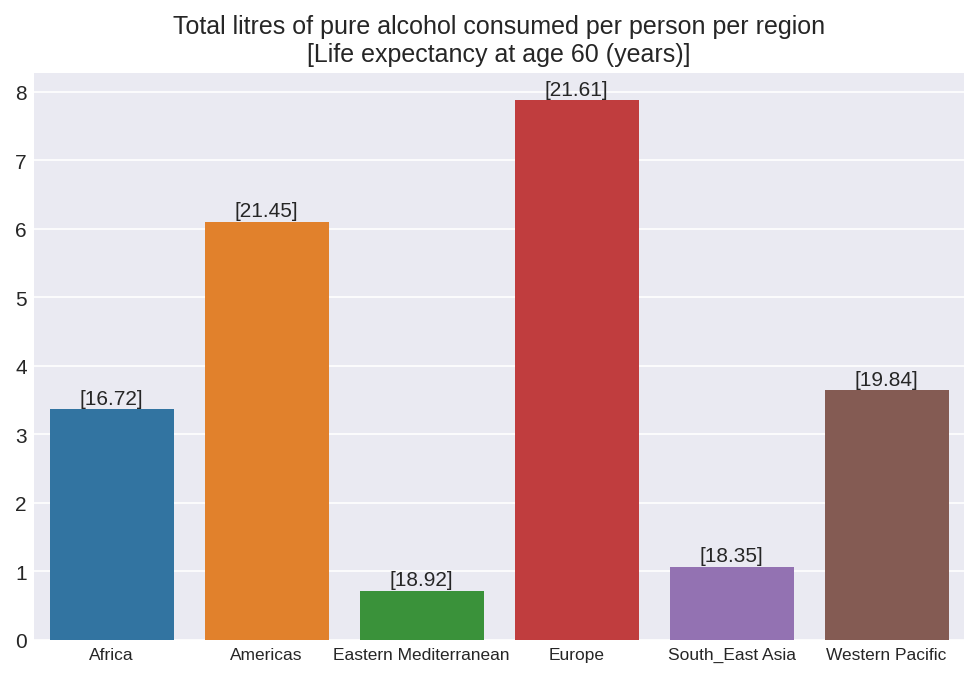

In [30]:
for ghocolumn, ghodisplay in lifeexp_ghos.items():

    ax = sns.barplot(data=df_region_alcohol, x='region', y='total_litres_of_pure_alcohol', errwidth=0, palette=CMAP.name)

    title  = 'Total litres of pure alcohol consumed per person per region'
    title += f'\n[{ghodisplay}]'

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')

    lifeexps = df[['region', ghocolumn]].groupby(by='region').mean()

    for i, row in df_region_alcohol.iterrows():
        ax.text(i, (row['total_litres_of_pure_alcohol'] + (df_region_alcohol['total_litres_of_pure_alcohol'].max() / 100)), f'{np.round(lifeexps.loc[row.region].values, 2)}', horizontalalignment='center')

    plt.show()

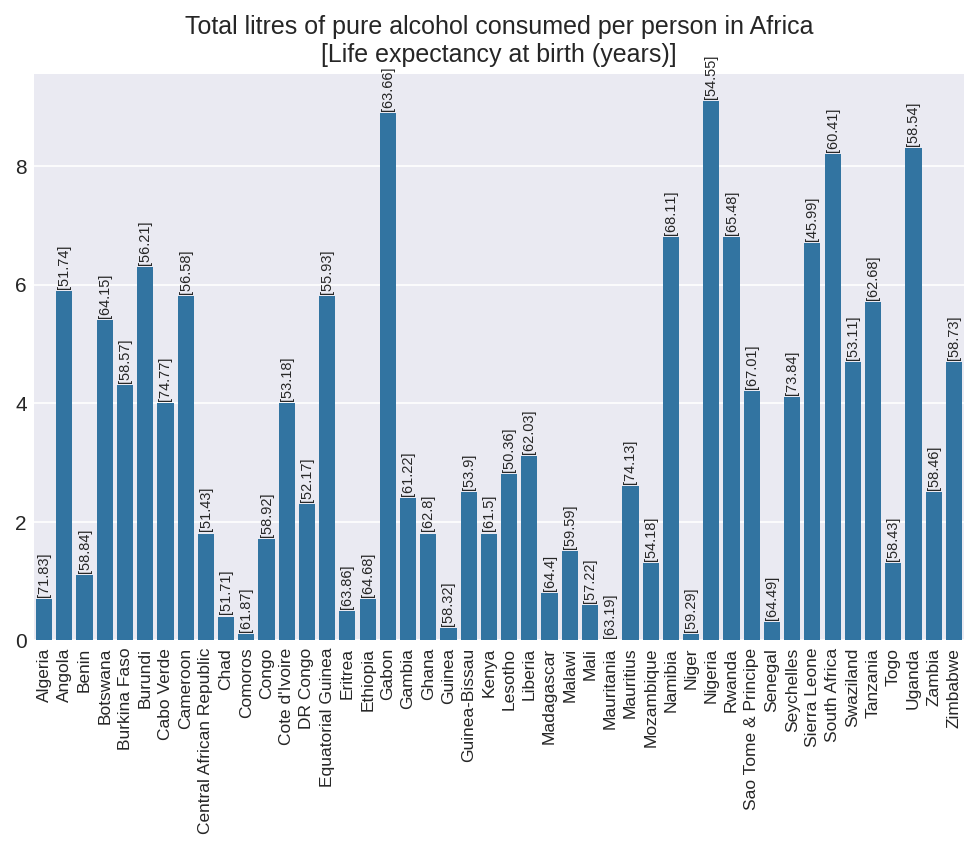

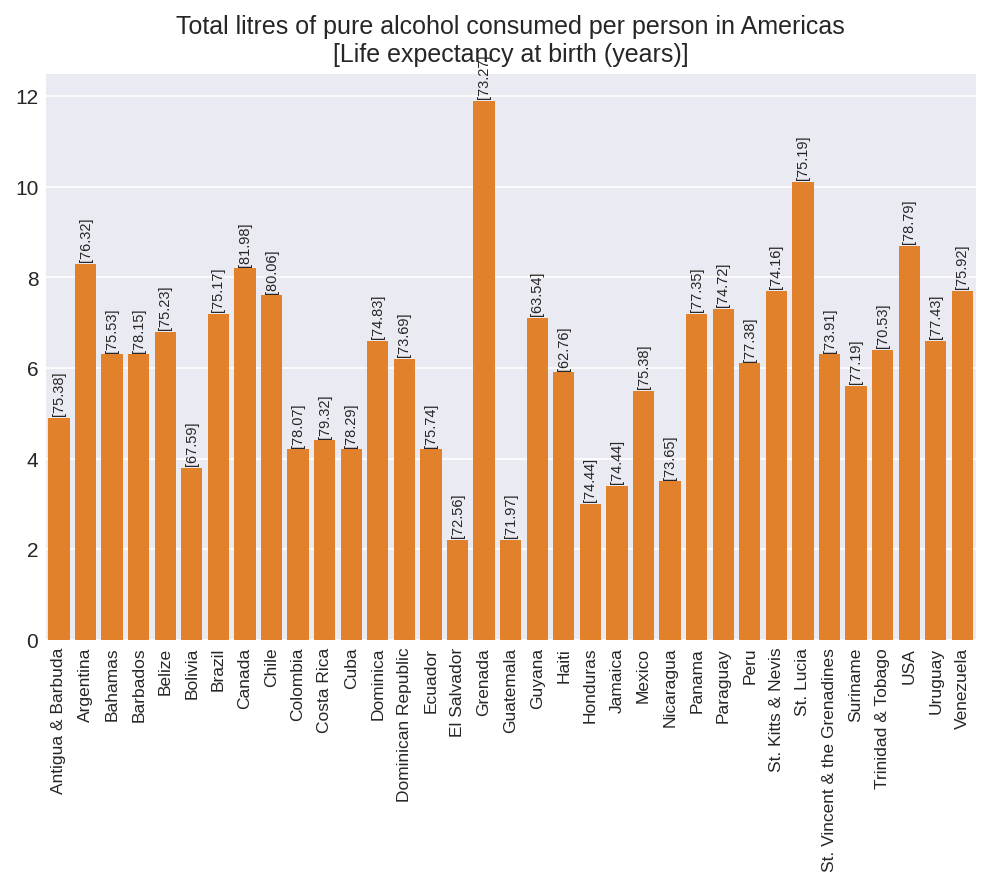

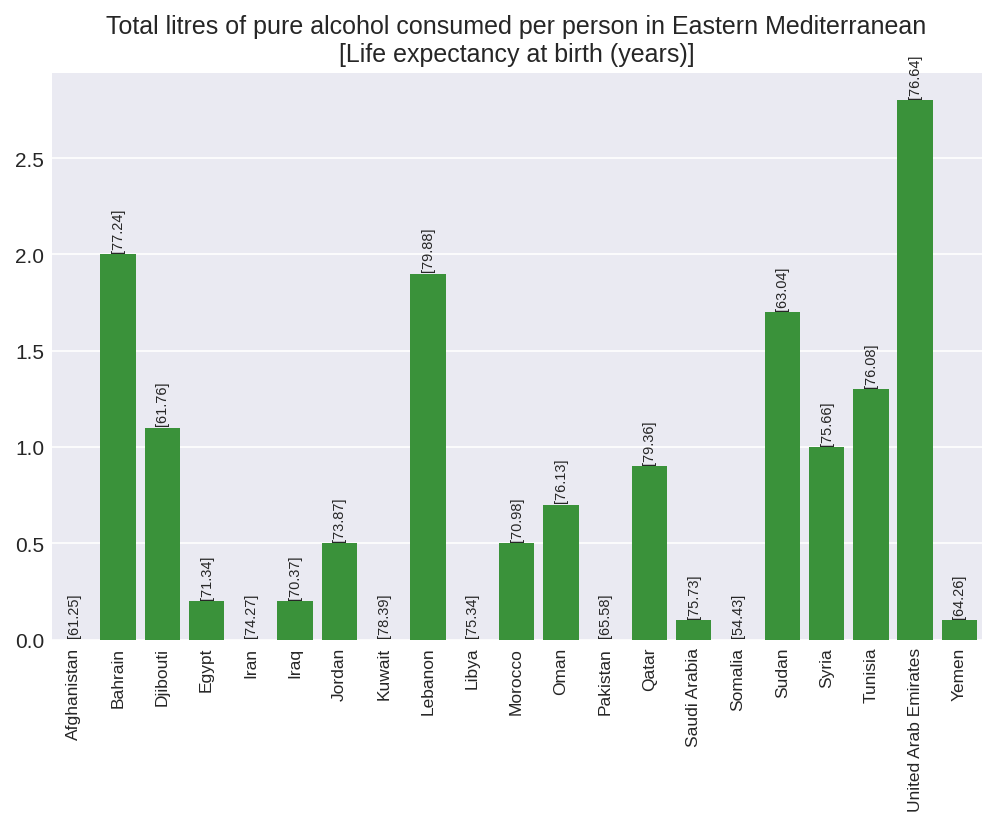

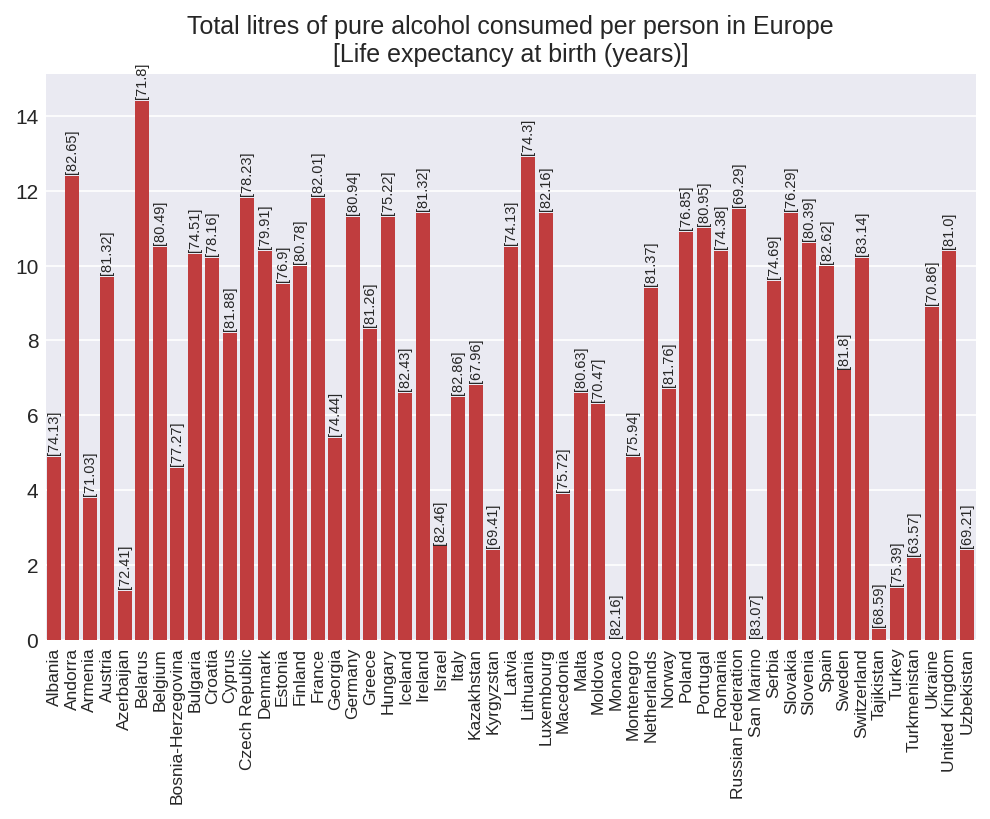

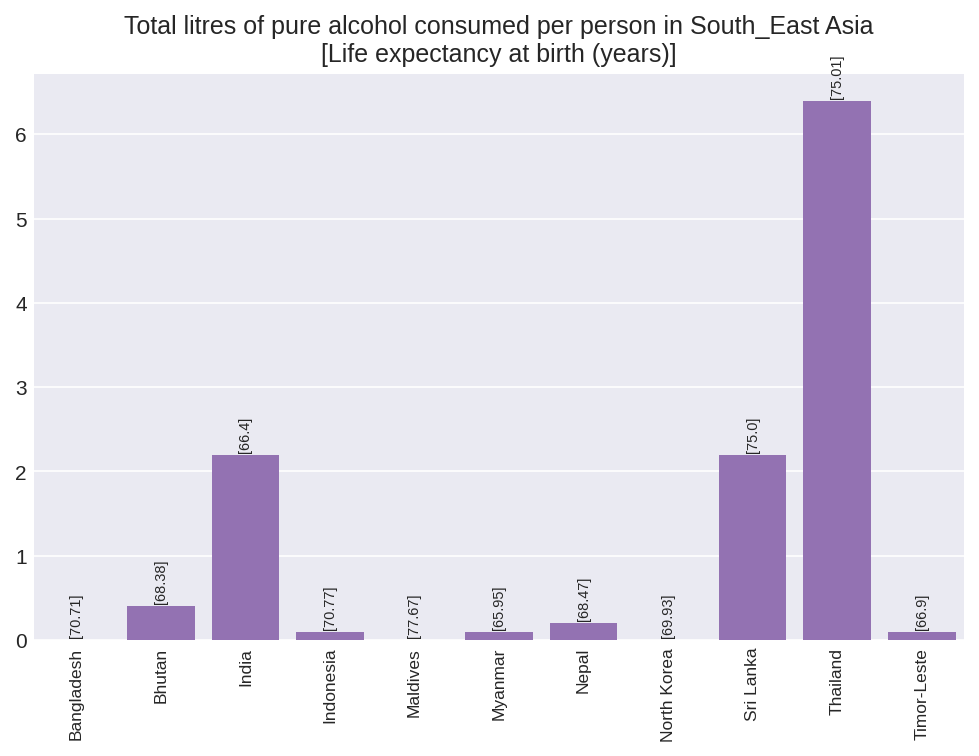

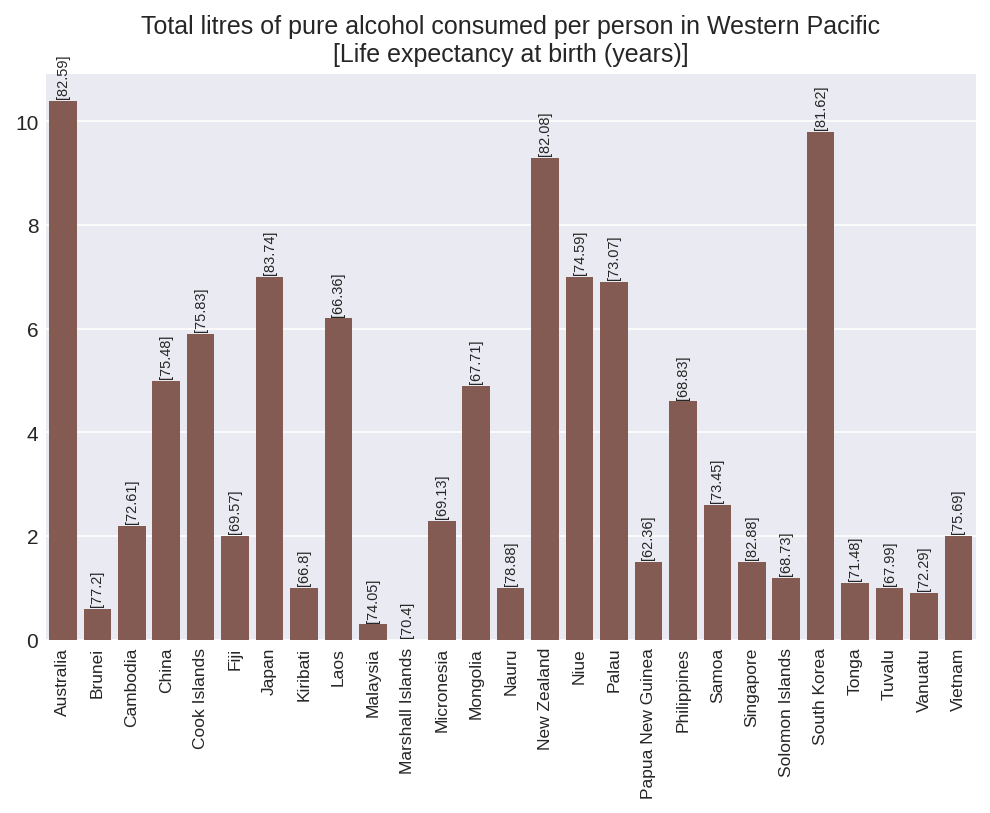

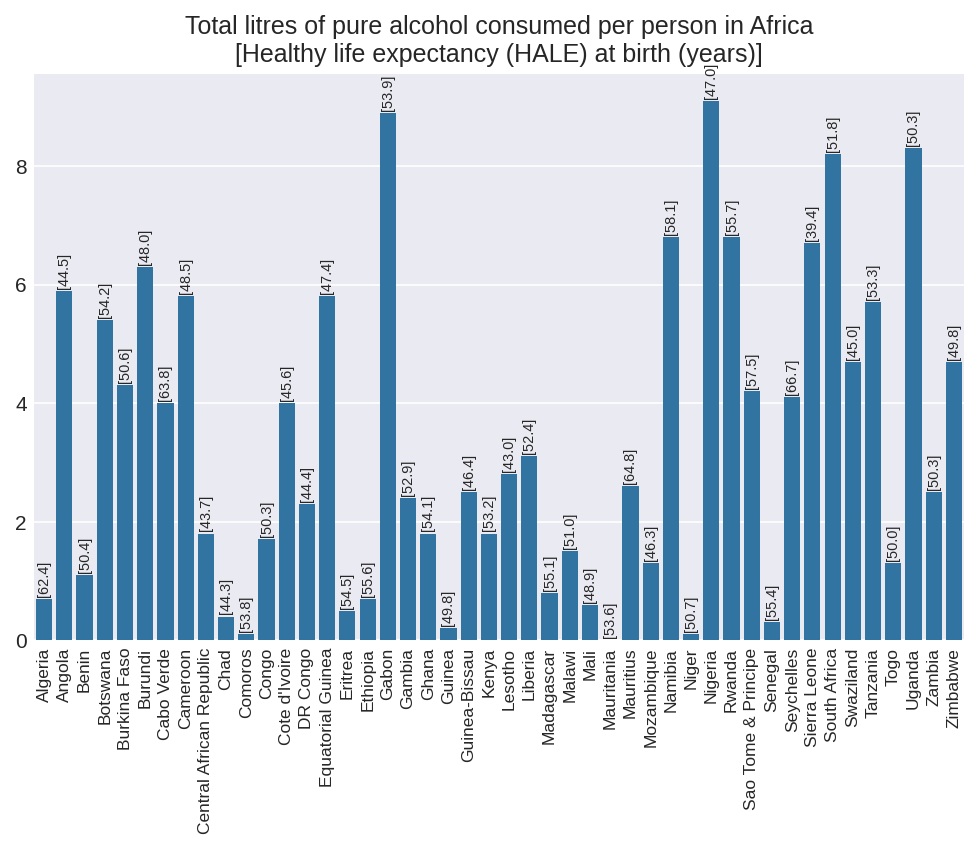

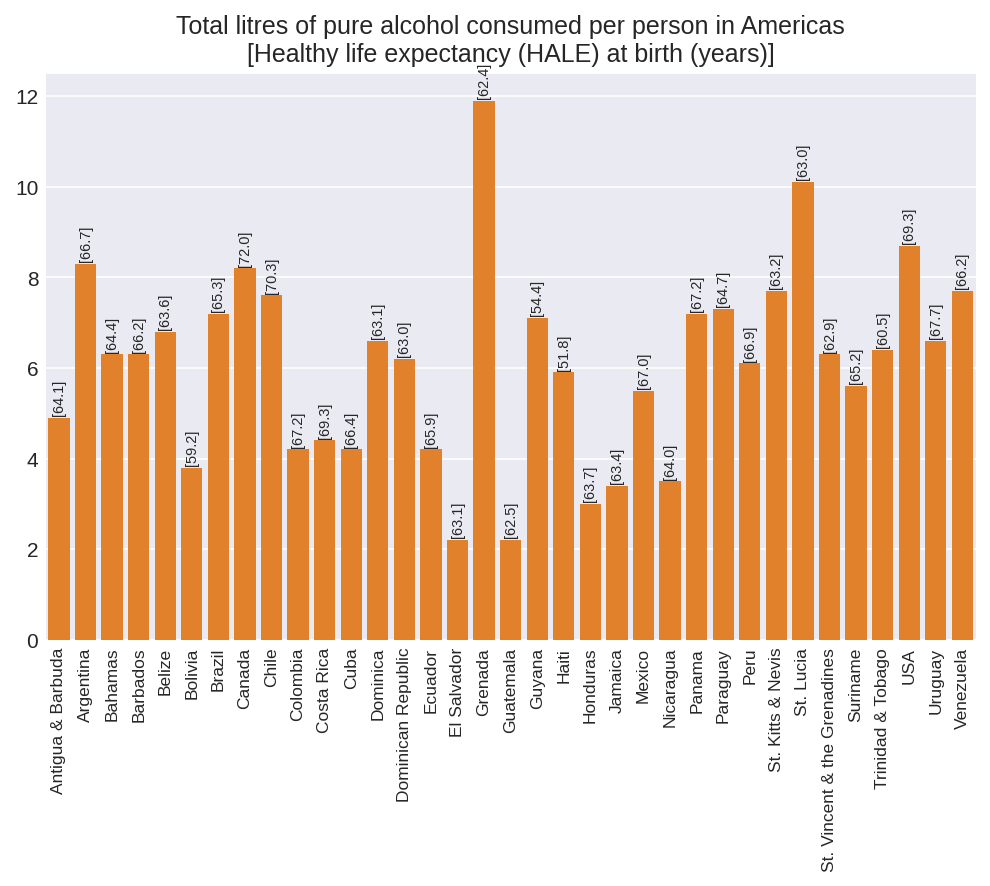

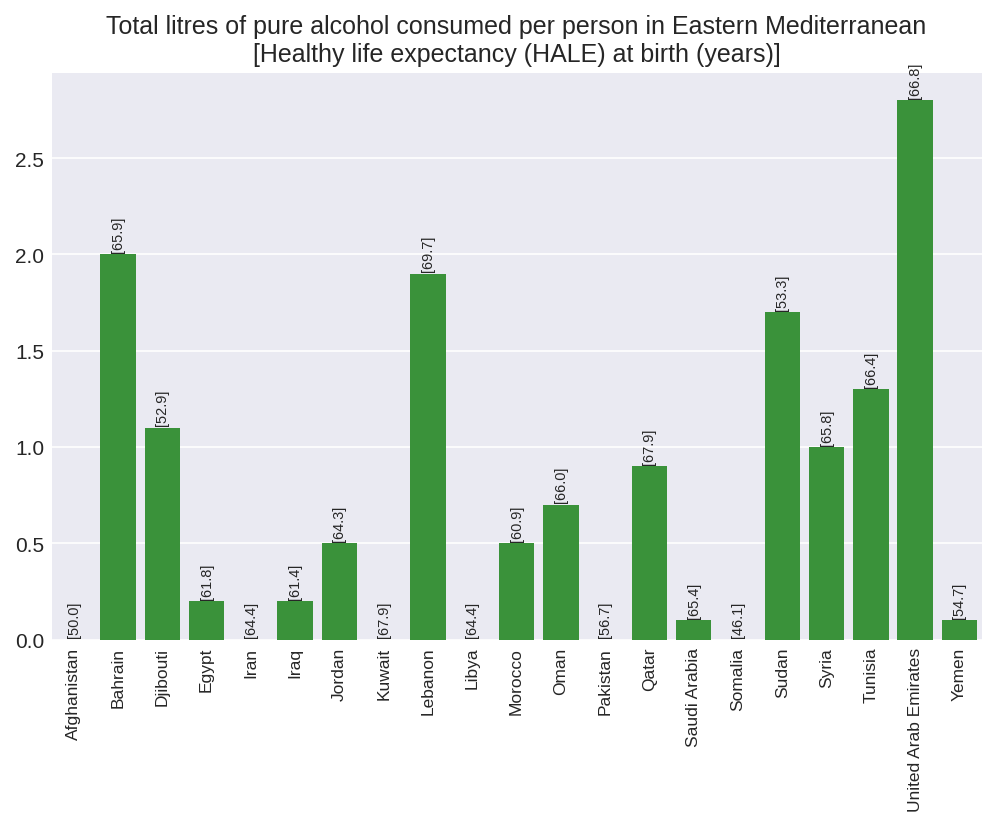

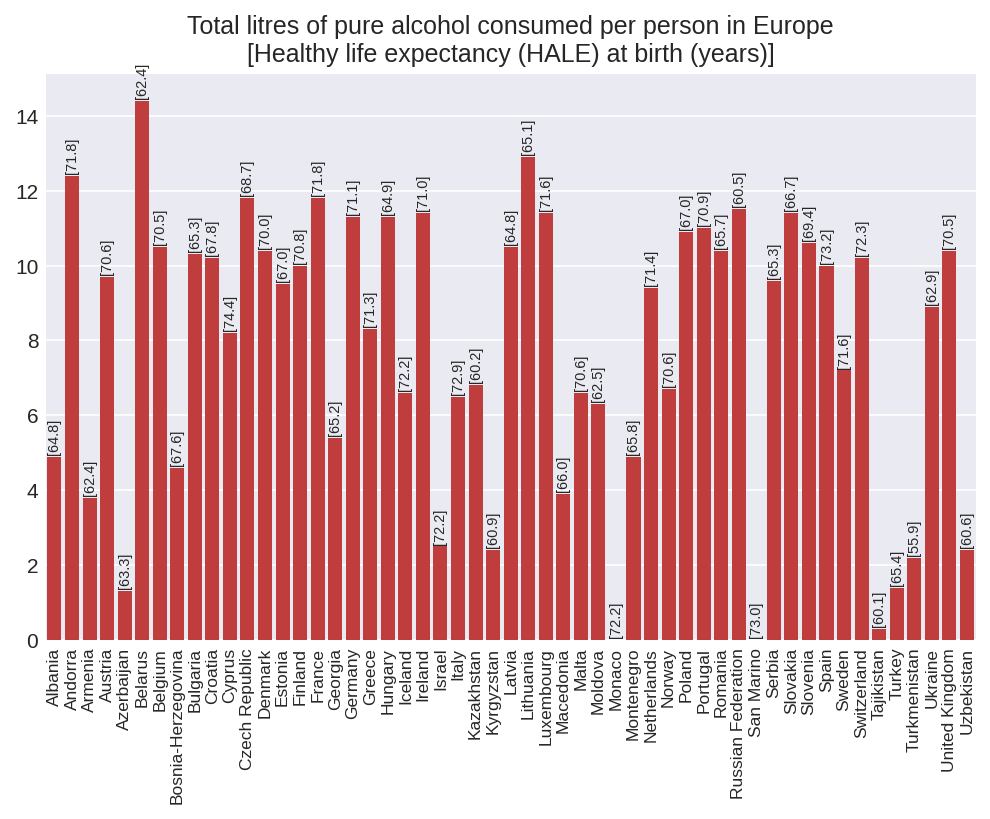

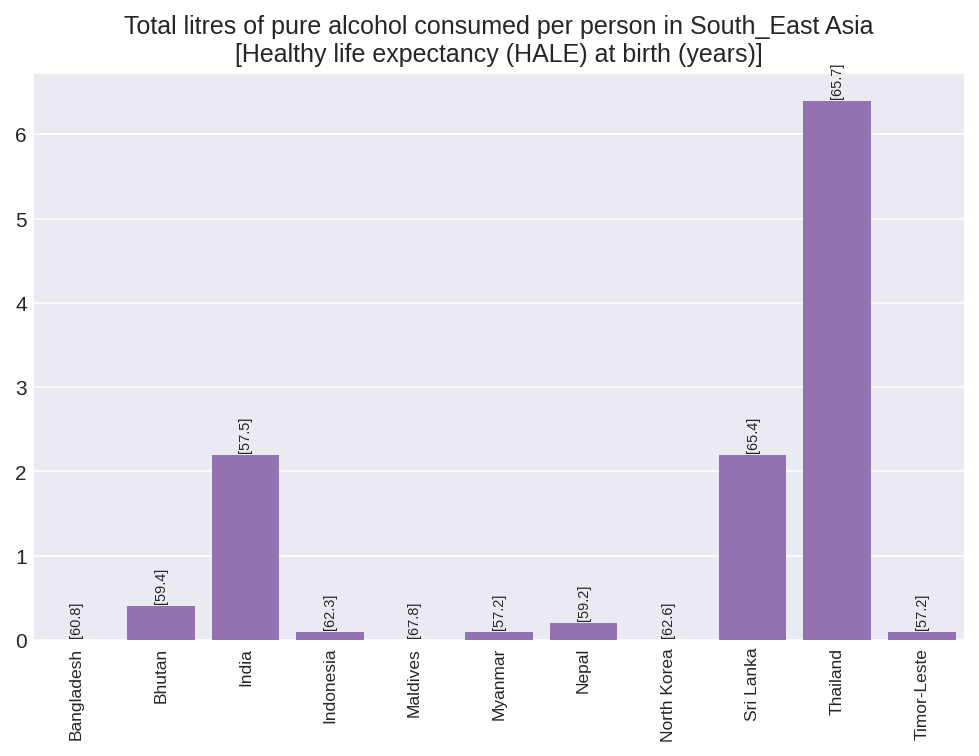

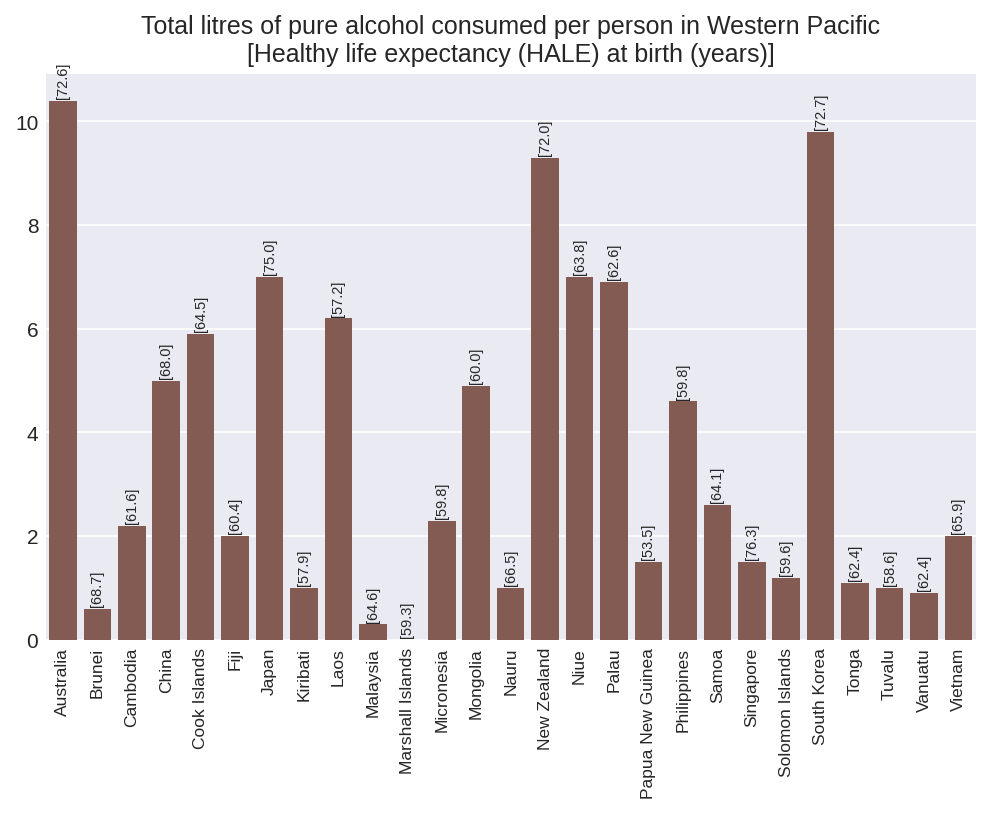

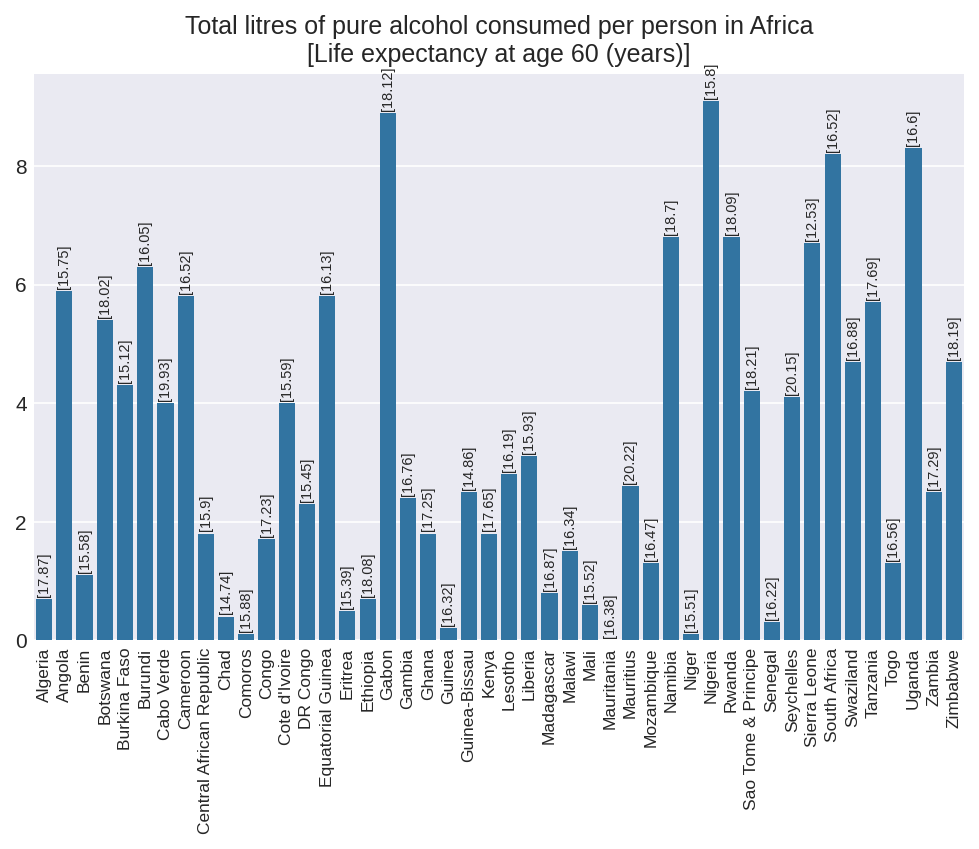

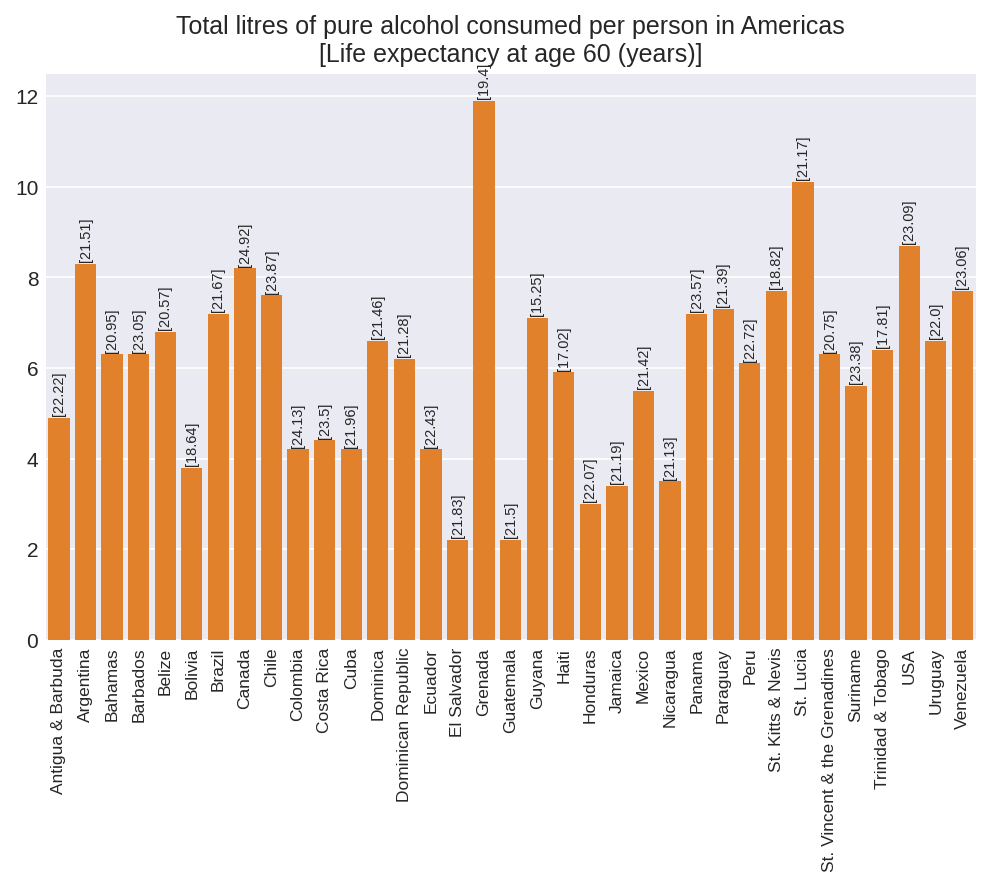

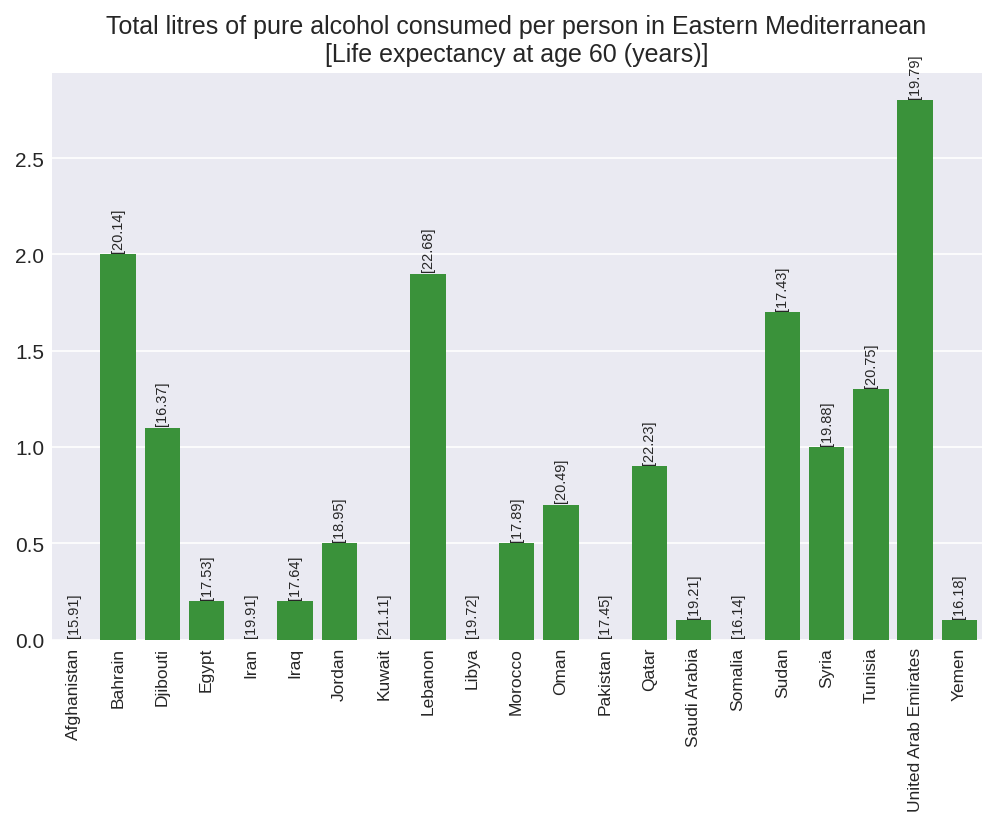

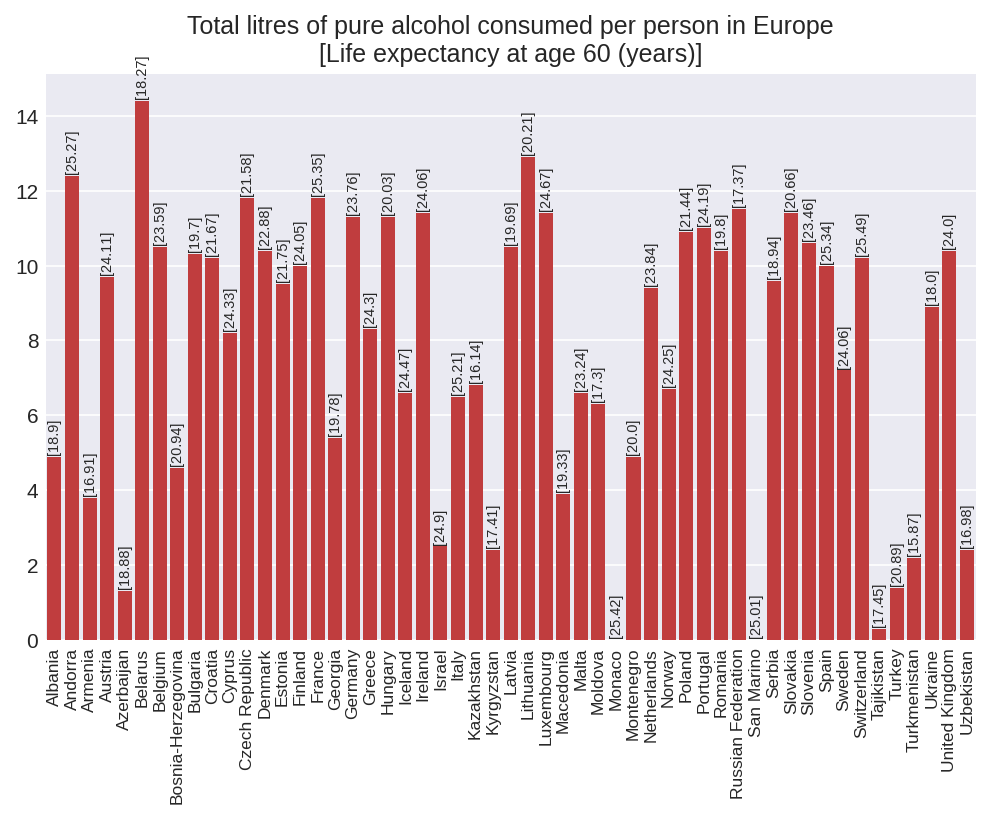

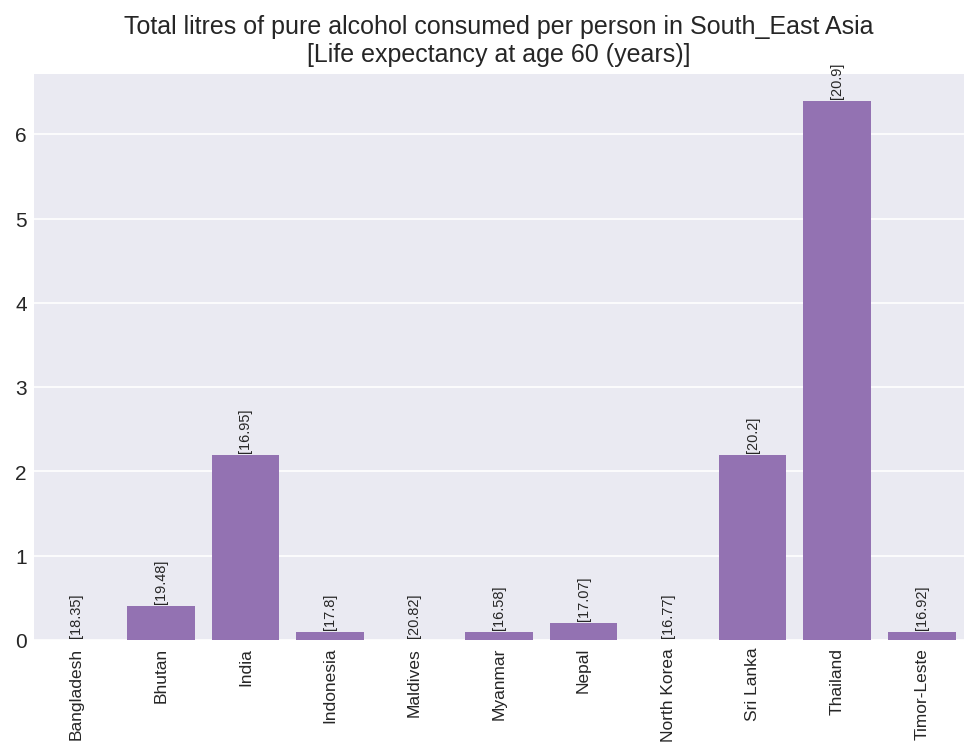

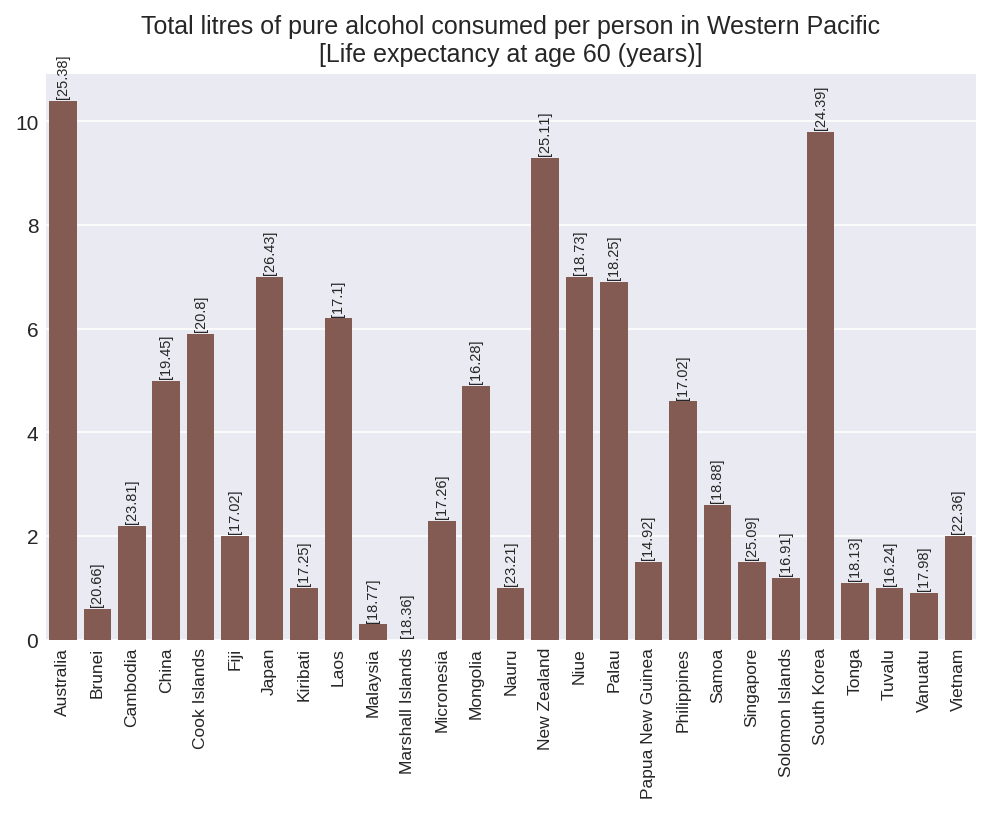

In [31]:
for ghocolumn, ghodisplay in lifeexp_ghos.items():

    for r, region in enumerate(lifeexp_regions):

        ax = sns.barplot(data=df[df['region'] == region], x='country', y='total_litres_of_pure_alcohol', errwidth=0, color=CMAP.colors[r])

        title  = f'Total litres of pure alcohol consumed per person in {region}'
        title += f'\n[{ghodisplay}]'

        plt.title(title)
        plt.xlabel('')
        plt.ylabel('')

        plt.xticks(rotation=90)

        b = 0

        for i, row in df[df['region'] == region].iterrows():
            ax.text(b, (row['total_litres_of_pure_alcohol'] + (df['total_litres_of_pure_alcohol'][df['region'] == region].max() / 100)), f'[{np.round(row[ghocolumn], 2)}]',
                    fontsize='x-small', horizontalalignment='center', rotation='vertical')
            b += 1

        plt.show()

## By income group

In [32]:
df.sort_values(by=['income', 'country'], inplace=True)

In [33]:
df_income_alcohol = df[['income', 'total_litres_of_pure_alcohol']].groupby(by='income').mean().reset_index()

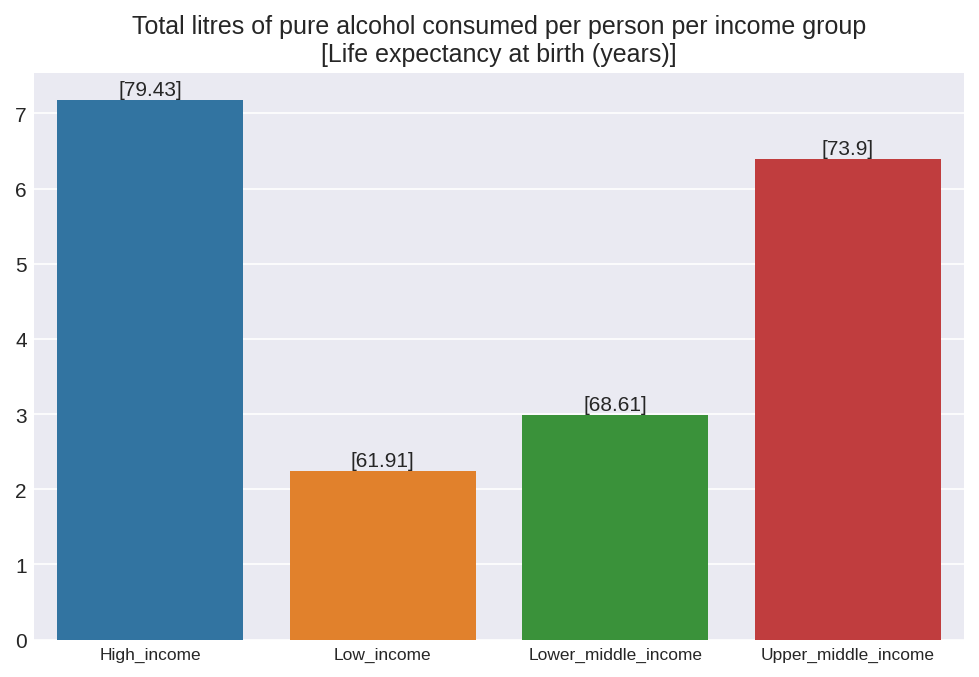

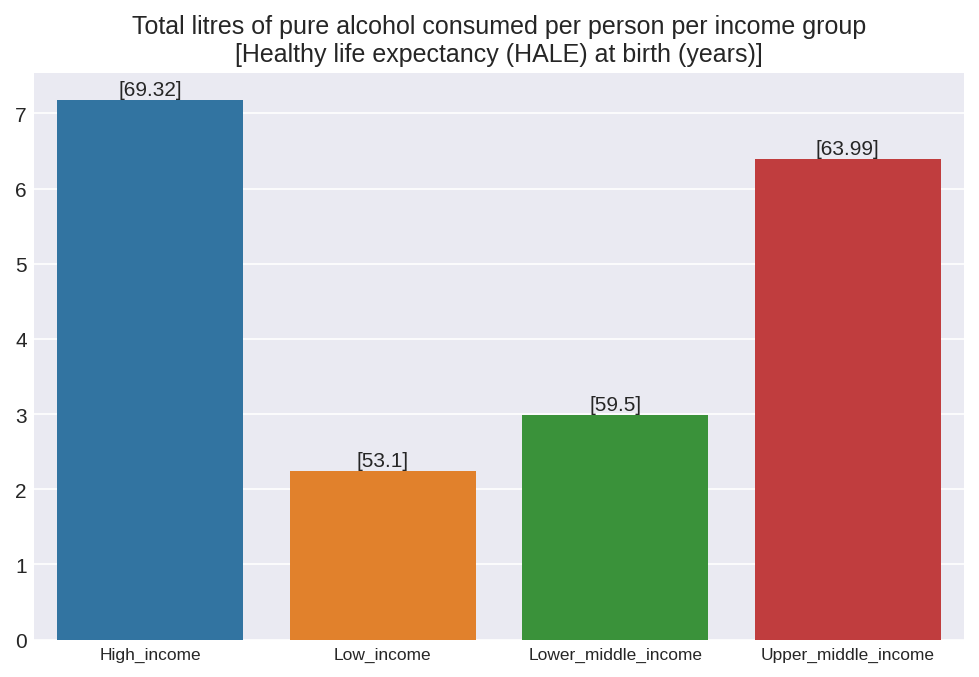

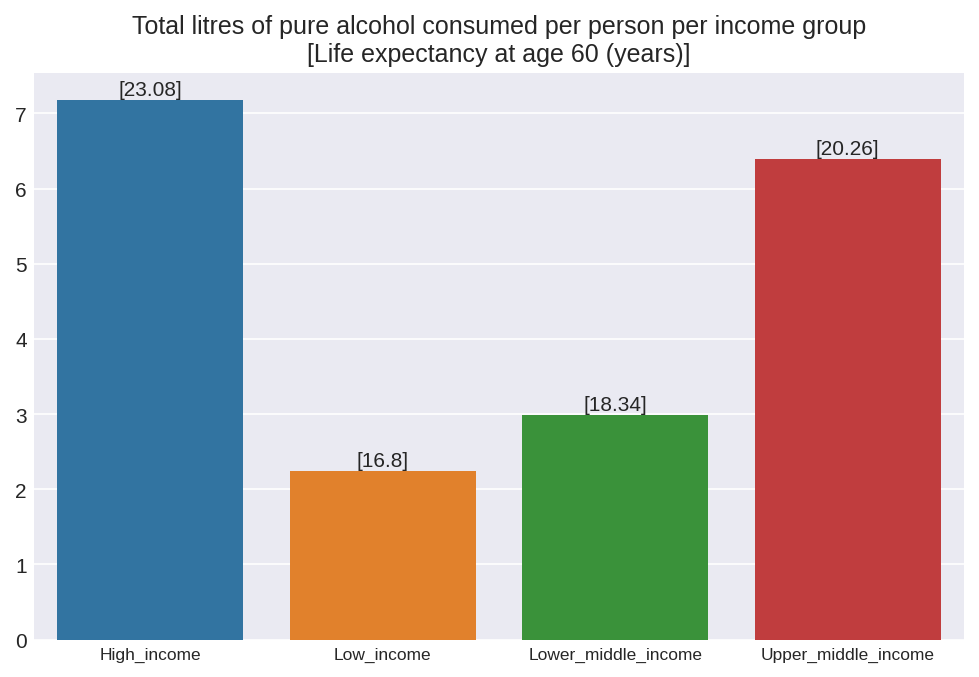

In [34]:
for ghocolumn, ghodisplay in lifeexp_ghos.items():
    
    ax = sns.barplot(data=df_income_alcohol, x='income', y='total_litres_of_pure_alcohol', errwidth=0, palette=CMAP.name)

    title  = 'Total litres of pure alcohol consumed per person per income group'
    title += f'\n[{ghodisplay}]'

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')

    lifeexps = df[['income', ghocolumn]].groupby(by='income').mean()

    for i, row in df_income_alcohol.iterrows():
        ax.text(i, (row['total_litres_of_pure_alcohol'] + (df_income_alcohol['total_litres_of_pure_alcohol'].max() / 100)), f'{np.round(lifeexps.loc[row.income].values, 2)}', horizontalalignment='center')

    plt.show()

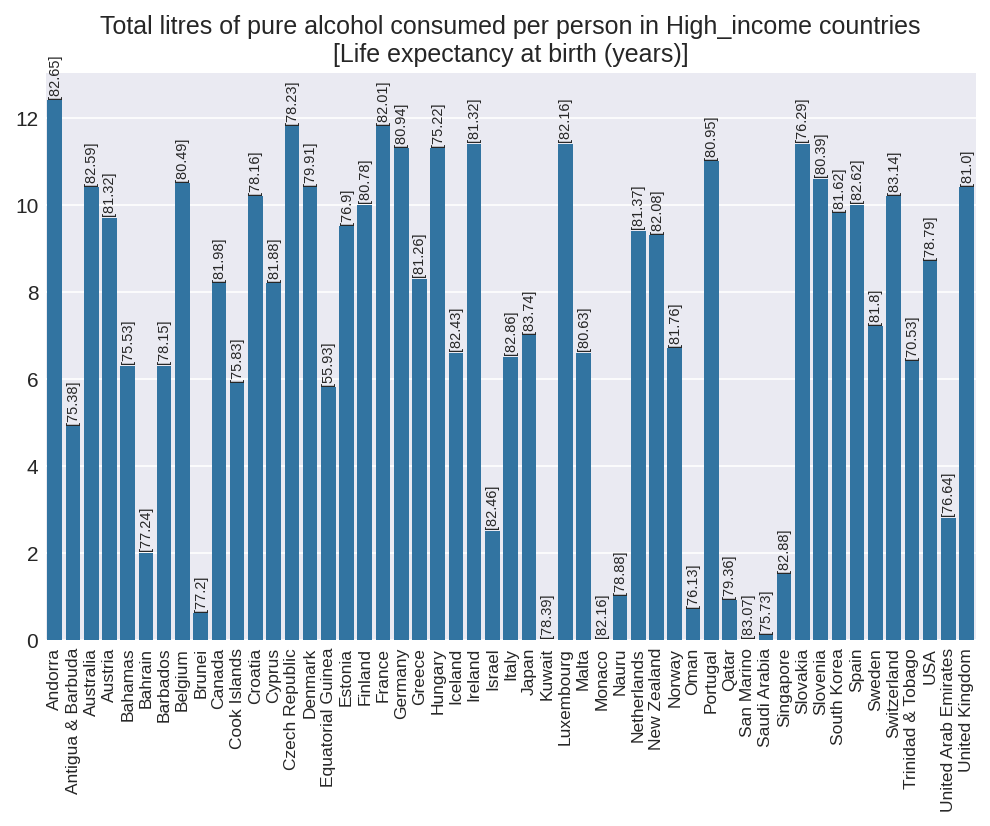

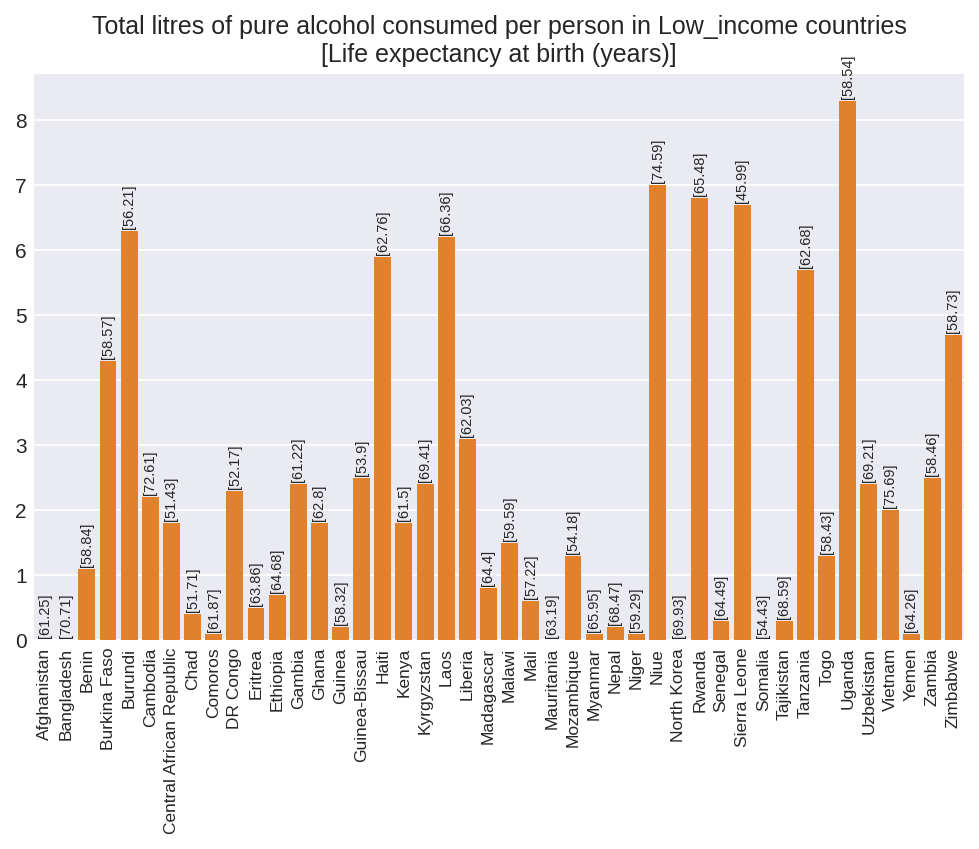

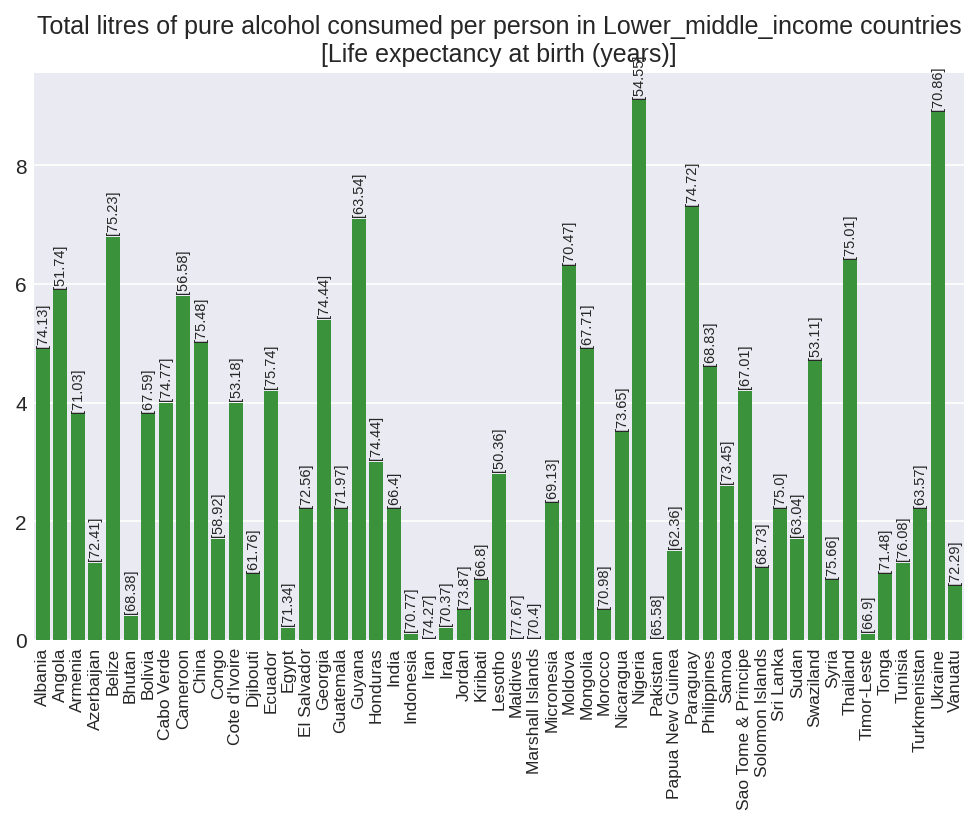

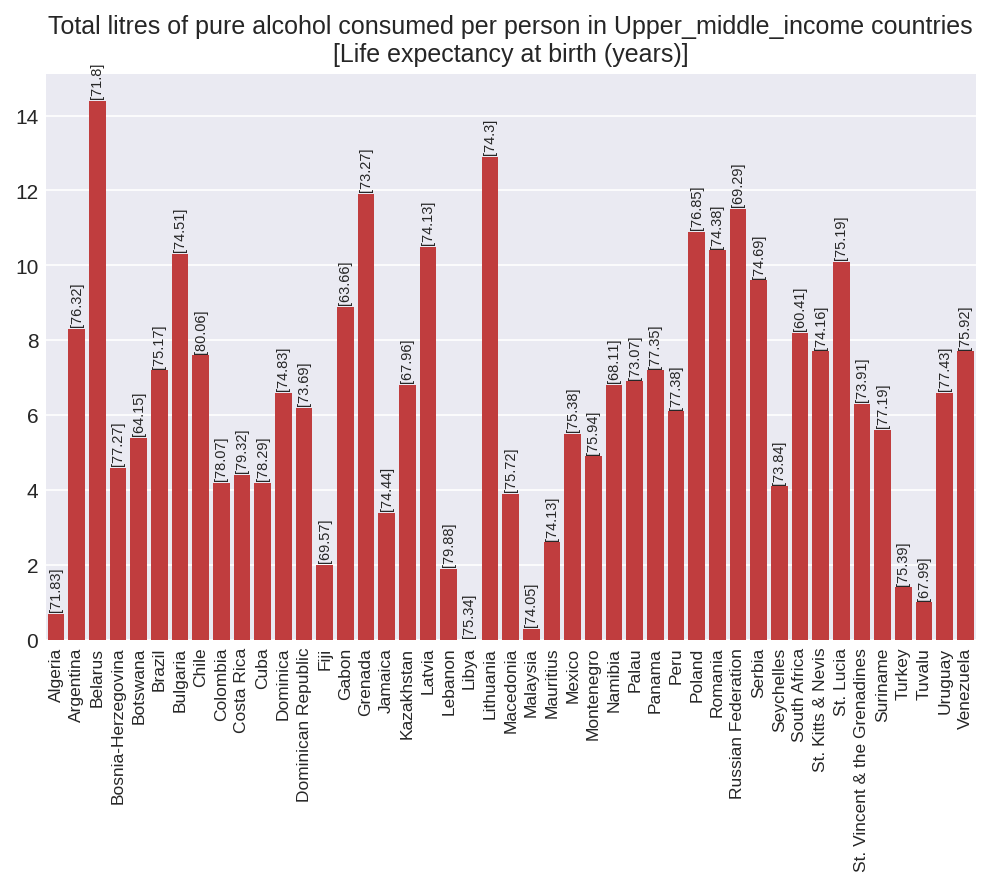

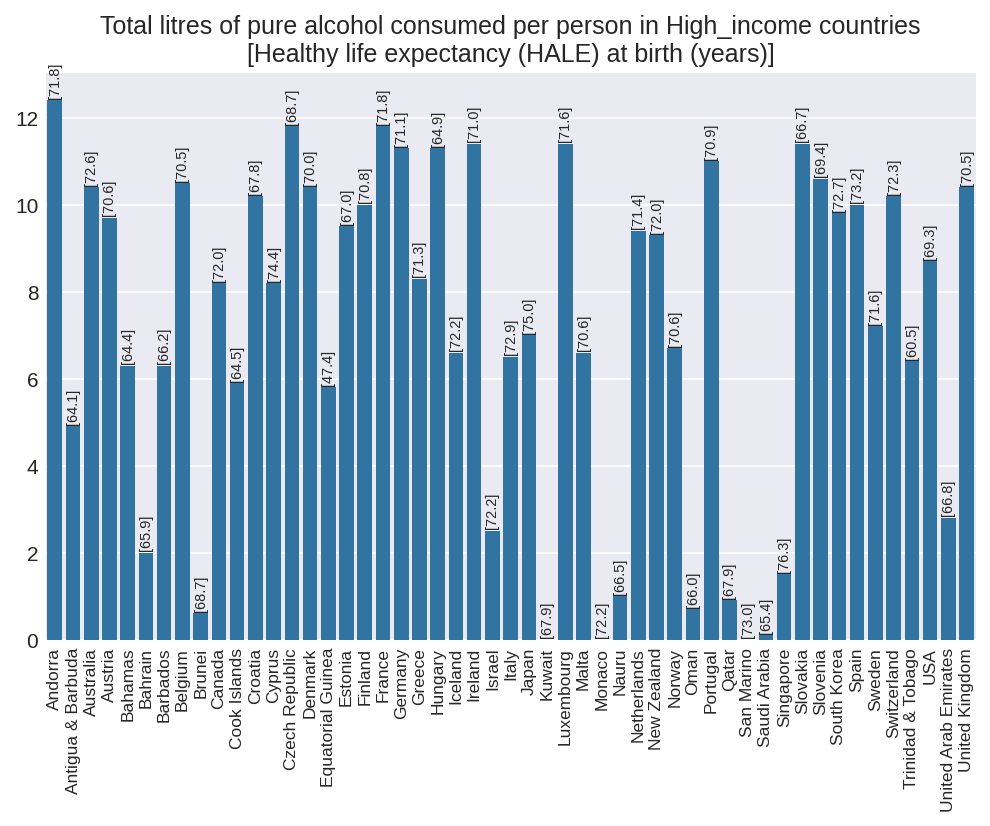

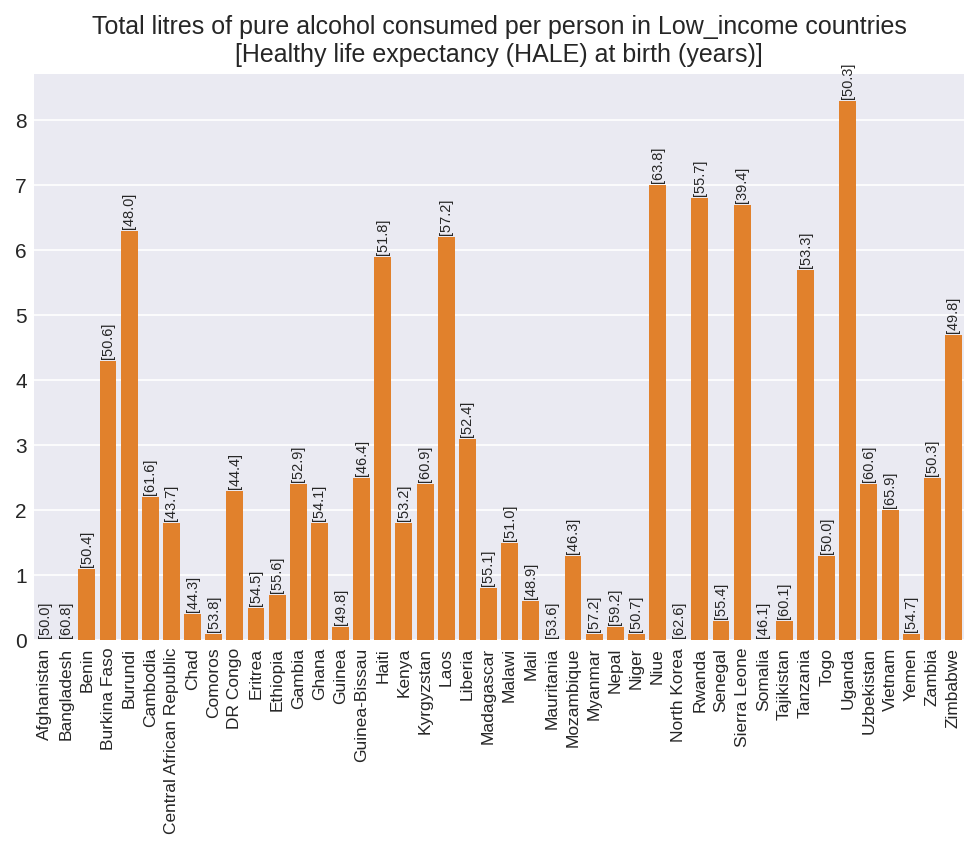

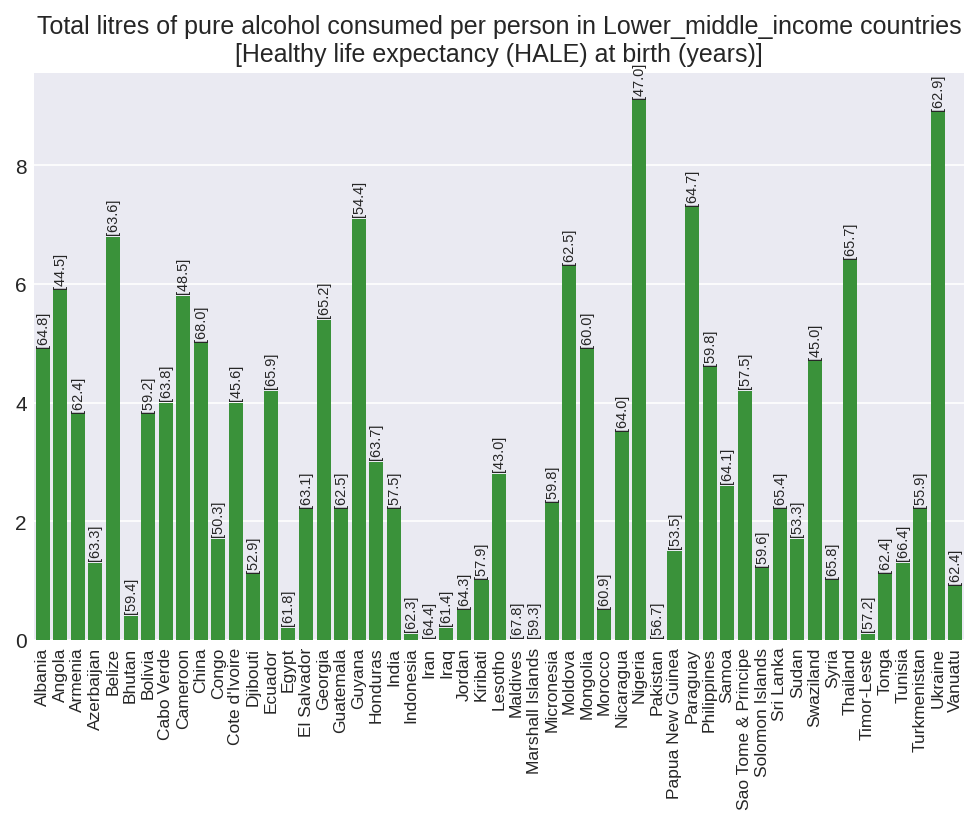

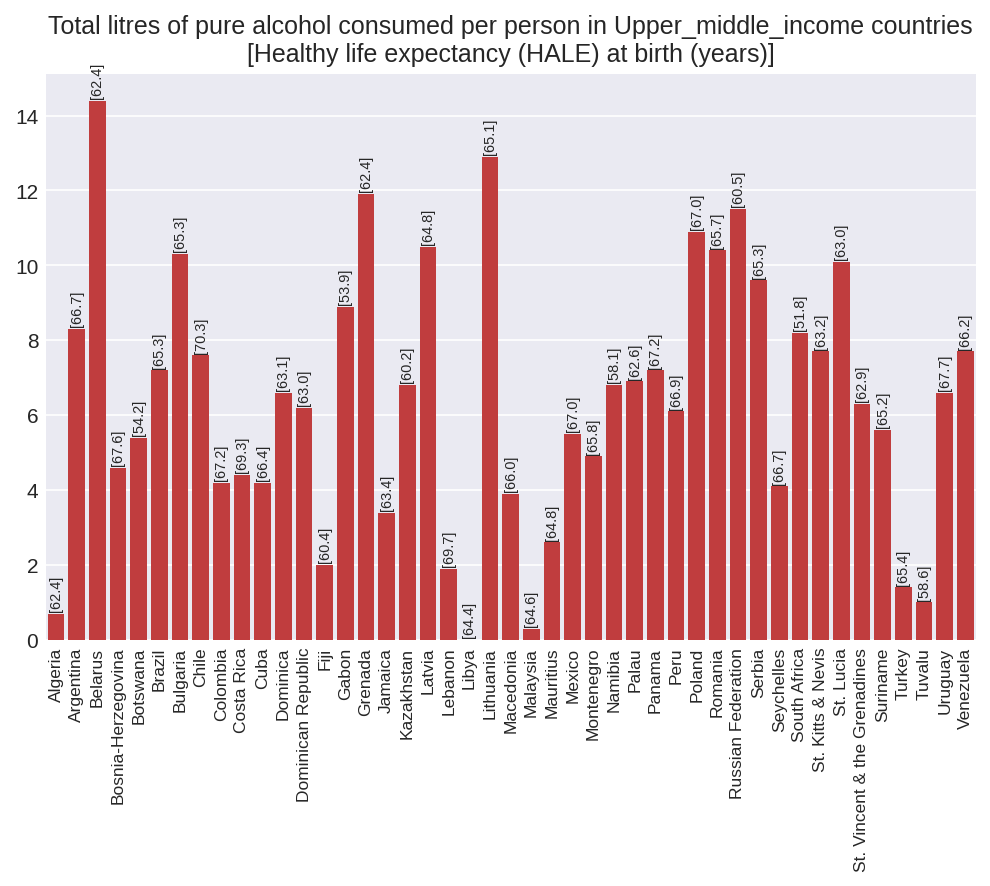

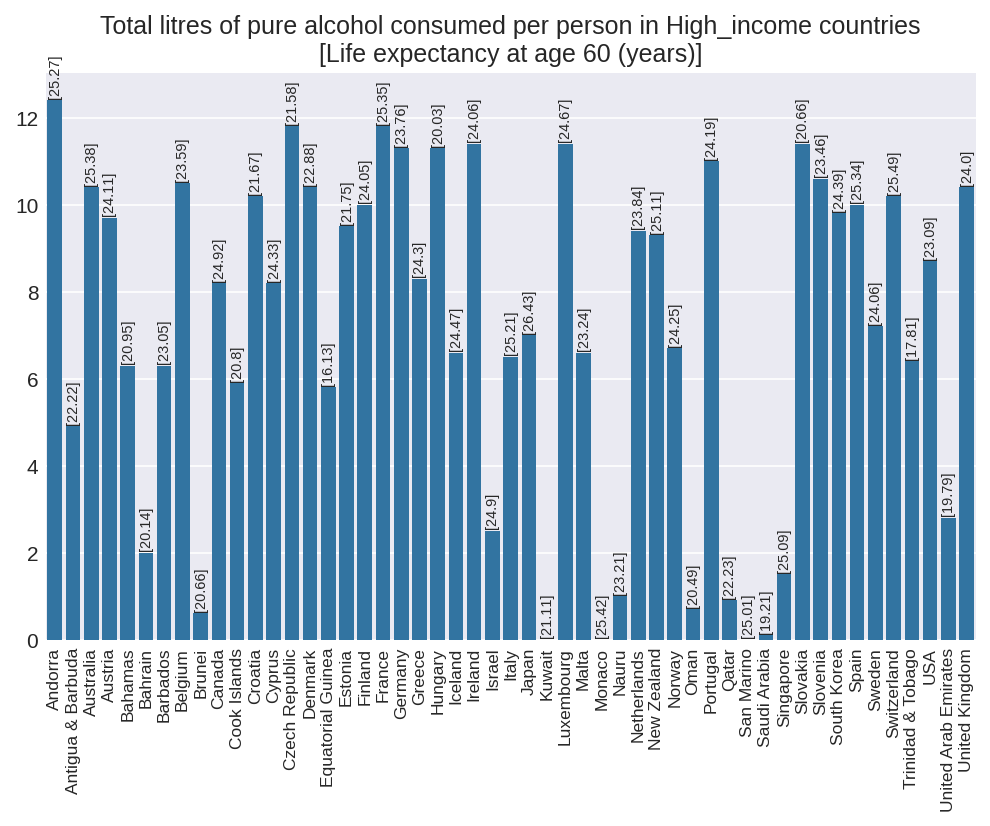

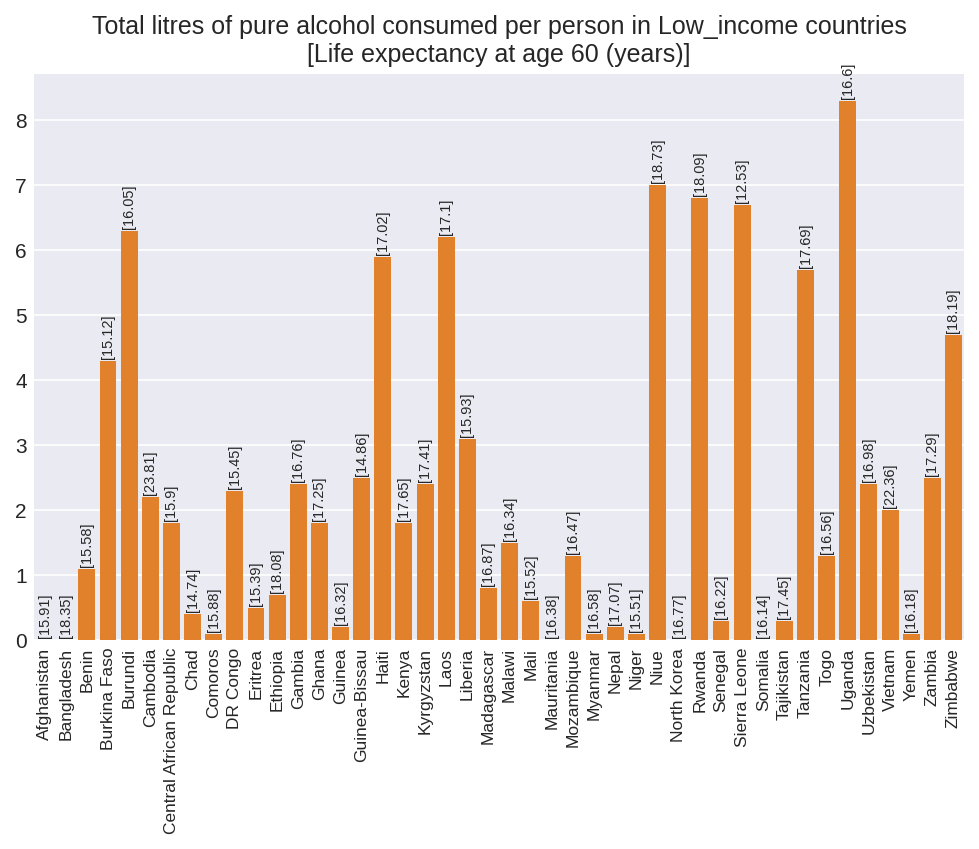

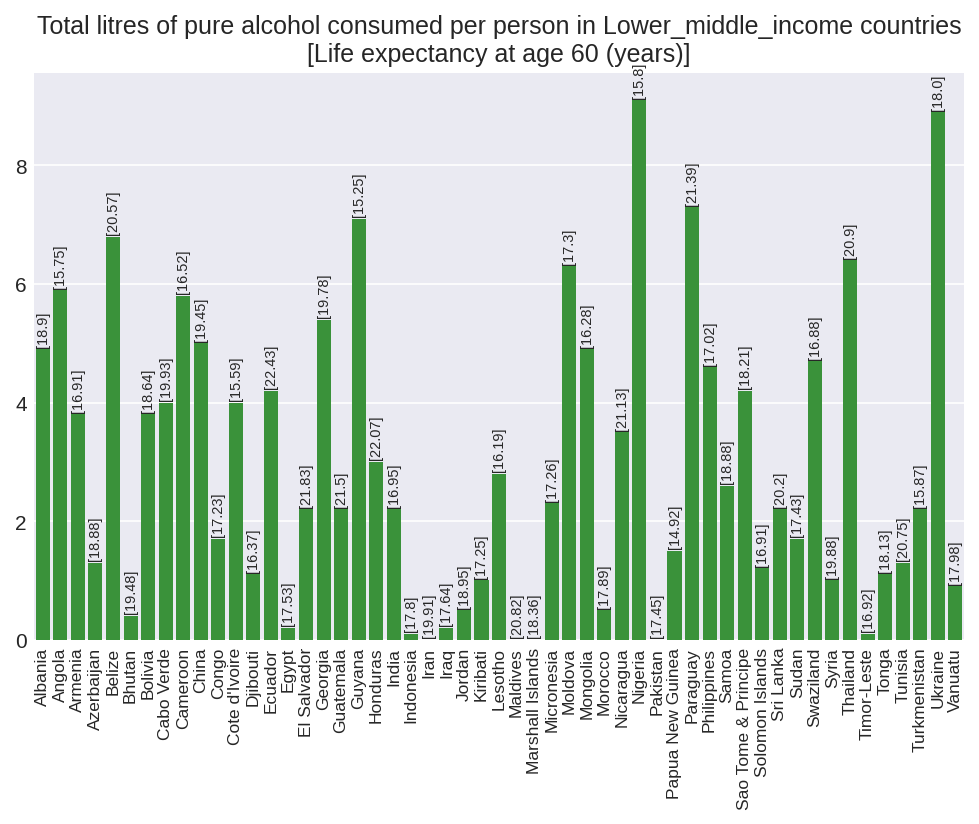

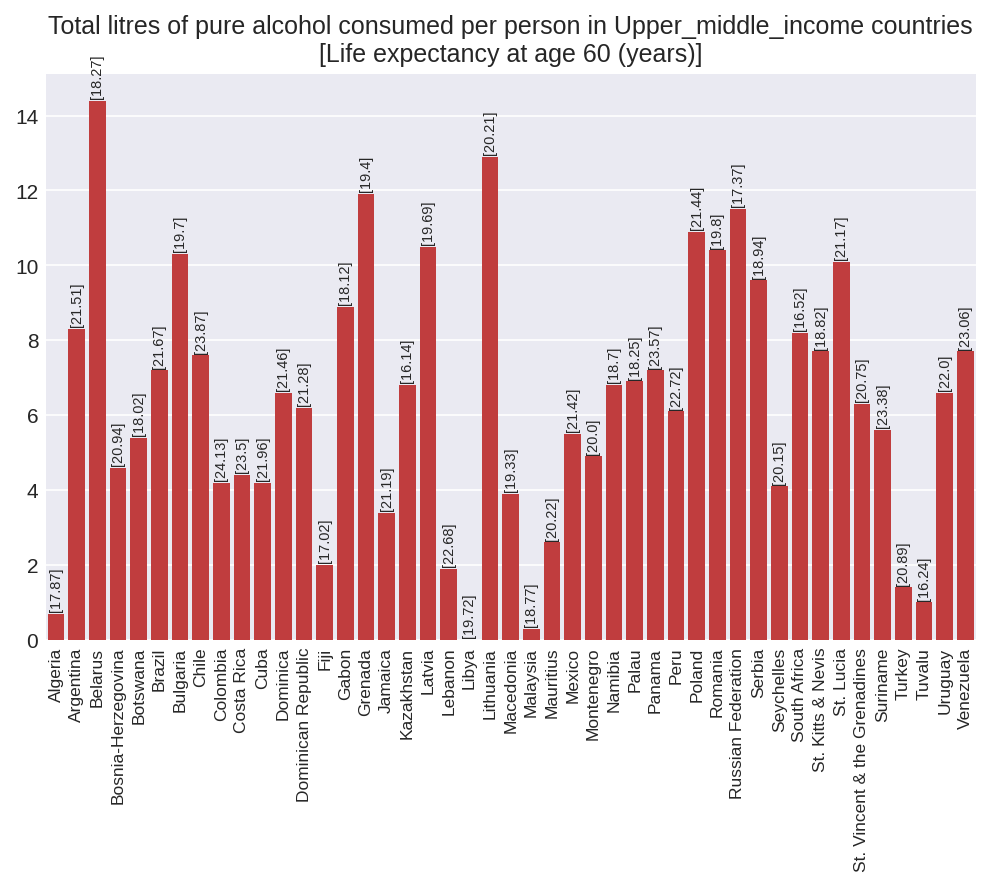

In [35]:
for ghocolumn, ghodisplay in lifeexp_ghos.items():

    for i, income in enumerate(lifeexp_incomes):

        ax = sns.barplot(data=df[df['income'] == income], x='country', y='total_litres_of_pure_alcohol', errwidth=0, color=CMAP.colors[i])

        title  = f'Total litres of pure alcohol consumed per person in {income} countries'
        title += f'\n[{ghodisplay}]'

        plt.title(title)
        plt.xlabel('')
        plt.ylabel('')

        plt.xticks(rotation=90)

        b = 0

        for i, row in df[df['income'] == income].iterrows():
            ax.text(b, (row['total_litres_of_pure_alcohol'] + (df['total_litres_of_pure_alcohol'][df['income'] == income].max() / 100)), f'[{np.round(row[ghocolumn], 2)}]',
                    fontsize='x-small', horizontalalignment='center', rotation='vertical')
            b += 1

        plt.show()